# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
> I am going to explore the following questions: 

> <a href="#general_explore">General explore</a>
> 1. Which movie has the best / worst revenue? What is the mean revenue? How did the revvenue develop over time?
> 2. Which movie had the highest / lowest budget? What is the mean budget? How did the budget develop over time?
    > 3. Which movie had the longest / shortest runtime? What is the average runtime? How did the average runtime develop?
> 4. Which movie got the highest / lowest profit? What is the mean profit? How did the profit develop over time?

> <a href="#correlation_explore">Correlation explore:</a>
> 1. Do movies with a longer runtime generate more profit in average?
> 2. Do movies with a longer runtime are more popular?
> 3. Do movies with a higher popularity generate more revenue?
> 4. Do movies with a higher popularity generate more profit?
> 5. Do movies become more popular over time?
> 6. Do movies with a higher budget get more revenue?
> 7. Do movies become more profitable over time?

> <a href="#monthly_distribution">Explore monthly distribution</a>
> 1. Which month has the most movie releases?
> 2. Which month gets the most profit?
> 3. Is the release month responsible for more or less profit?
> 4. Which month is the most popular in average?

> <a href="#cgp_exploration">Cast, genre and production company exploration</a>
> 1. Which is the genre with the most movies released?
> 2. Which movie director did release the most movies?
> 3. Which cast did take part in most movie releases?
> 4. Which production company has been the busiest when it comes to movie releases?
> 5. Which cast accounts for the highest total popularity?
> 6. Which cast accounts for the highest average profit earned by movies?
> 7. Which are the 20 most popular genres?
> 8. Which genres have the highest average popularity?
> 9. Which genre generated the most profit?
> 10. Which genres have the highest average profit?
> 11. What are the best production companies in terms of total profit?
> 12. Which production companies are the most popular ones?
> 13. Which production companies are generating the most profit in average?
> 14. Which production companies are getting the highest average popularity?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pylab import figure, show, legend, ylabel
% matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> **Data Wrangling**: Before i am able to explore the data, i have to wrangle and clean it first. Below, i am going to describe the steps i have taken to wrangle and clean the data.

### General Properties

In [2]:
# Load csv
tmdb_movie_dataset = pd.read_csv('tmdb-movies.csv')
# call shape function
tmdb_movie_dataset.shape

(10866, 21)

> Using .shape, we get the info that our datast has 10866 rows and 21 columns.

> Let's have look how our data looks like using the .head() function.

In [3]:
tmdb_movie_dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Findings:
> - At the first glance, we have columns / rows with numbers, but also with strings, like cast, director and genre. But  
> - we have columns which seem to have dates stored, like release year and release date
> - every movie seems to have it's own, uniqe id. 
> - columns like cast, director or genre have strings, which are seperated by a pipe
> - column 'runtime' gives us information on a movies runtime, which is minutes

> Now i want to get more information on the dataset. I want to know the number of entries per column, so that i can which columns have zero entries.

In [4]:
# get further info on the dataset
tmdb_movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> As you can see, there is a significant number of zero values in the homepage column. Therefore i will drop this column later, as this column won't be part of my analysis anyway. The same goes for tagline and keywords. But before i'll do that, let's investigate further on our data. 

In [5]:
tmdb_movie_dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Taking a look a look at the minimum value for tunime, revenue or budget, we can see that we have null values in our dataset. In order to get an overview how many null values we do have, we are going to use the isnull function and get the sum for each column.

In [6]:
tmdb_movie_dataset.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> There are only a few rows in the id column, which seem to have null values, but it looks a lot different for homepage, tagline or keywords. So this might be columns, which are not worth keeping for analysis, as the seem to be missing quite often. Let's have a look if there are duplicate rows in our dataset.

In [7]:
tmdb_movie_dataset.duplicated().sum()

1

> Yes there are, but only one. So there are now rows who are total duplicates.

> Let's see, how many unique values we do have in our dataset. Therefore, we are using the nunique() function.

In [8]:
tmdb_movie_dataset.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> Taking a look at the uniqueness in each row, we can get the following clues:
> - only 56 unique values in release_year totaly make sense, as we are looking at movie data from 1960 on
> - we have 10865 ids, but only 10571 original titles. So it seems that there are movies which might share the same title. Same goes for other columns like cast, directors it etc. which kind of makes sense as wel.

> We already know that there are movies which seem to have null revenue. Let's see get a glance at some of them.

In [9]:
# query the dataset for 0 in revenue
zero_revenue = tmdb_movie_dataset.query('revenue == 0')
# show first 5 rows by using the head() function
zero_revenue.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


> There seem to be movies which have budget information, but none for revenue. I will have to decide later if i am going to use this data, as 0 values will affect calculations like average. Let's see hw mane zero values we do have.

In [10]:
# group entries in revenue column and count them by using the id column
zero_revenue_count = tmdb_movie_dataset.groupby('revenue').count()['id']
# show the first 5 rows.
zero_revenue_count.head()

revenue
0    6016
2       2
3       3
5       2
6       2
Name: id, dtype: int64

> That's a lot. We have 6016 movies with 0 revenue. So that's a lot and will definitely affect calculations if we keep them. Let's see how the budget column is doing.

In [11]:
# query budget column for 0 
zero_budget = tmdb_movie_dataset.query('budget == 0')
# show first 5 columns
zero_budget.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


> As you can see, we have movies with 0 budget but with revenue. It's seems that we have missing data in our dataset right here. Let's see how many zeros we do have in our budget column.

In [12]:
# group entries in budget column and count by using id column
zero_budget_count = tmdb_movie_dataset.groupby('budget').count()['id']
# show fisrt 5 rows
zero_budget_count.head()

budget
0    5696
1       4
2       1
3       3
5       1
Name: id, dtype: int64

> Again, we have quite a lot movies with zero budget. We will most likely have to get rid of these entries as well. But that might influence data integrity, so we will have to see how many movies will be left after dropping. Let's check the same for the runtime column.

In [13]:
zero_runtime = tmdb_movie_dataset.query('runtime == 0')
zero_runtime.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.0,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.0,0.0


In [14]:
zero_runtime_count = tmdb_movie_dataset.groupby('runtime').count()['id']
zero_runtime_count.head()

runtime
0    31
2     5
3    11
4    17
5    17
Name: id, dtype: int64

In total, we only have 31 movies with 0 runtime. So dropping those will be ok, as the total number is not that big. 

> Summary of my findings and my decisions based on it:
>
><a href="#drop_columns">1. Drop columns</a>
>
> First, I am going to drop columns which i won't need for my analysis. These columns are:
> * homepage
> * tagline
> * overview
> * budget_adj
> * revenue_adj
> * imbd_id
> * keywords
> I will keep all other columns, because i need them for my analysis or for categorization.
>
><a href="#drop_duplicate">2. Drop duplicates</a>
>
> Second, I am going to drop duplicates from the dataframe. As there aren't that many duplicates in the dataframe, it won't make a big impact.
>
><a href="#drop_null_values">3. Drop null values</a>
>
> Third, i am going drop null values, which can be found in the following columns:
> * director
> * genres
> > Similar to dropping rows in budget and revenue columns, i will drop rows with NaN for director and genre column, as zeros would affect calculations like mean or else. 
><a href="#drop_zero_values">4. Drop zero values</a>
>
> Fourth, i will drop rows with 0 values for the follow rows:
> * budget
> * revenue
> This will effect quite a big number of rows. Though one could say that deleting so many rows could be bad for data integrity, i decided to drop them anyway, because 0 and / or nan values will either influence my exploratory data analysis or make sorting / filtering data difficult at some points. I didn't choose to to replace 0 values with NaN values, because you can't say that there are NaN values, as most of the movies will have budgets and / or revenue, but they aren't available in our dataset for some reason. In my holy opinion, the remaining data will be enough to maintain the data integrity. 
>
><a href="#drop_small_zero">5. Drop small zero values</a>
>
> Fifth, i am going to drop zero value rows for columns with a small number of zeros. The column is:
> * runtime
> Similar to dropping rows in budget and revenue columns, i will drop rows with zero runtime, as zeros would affect calculations like mean or else. 
>
><a href="#format_datetime">6. Drop small zero values</a>
>
> At last, i am going to change to format of the release_date column to datetime.
> As i am going to work with data in my analysis (e. g. group days into month), i need a clean and matching datatype.
>

### Data Cleaning (Replace this with more specific notes!)

<a id='drop_columns'></a>
### 1. Drop columns

> The following function will drop the columns which i won't need for my analysis. Then i will use the .head() function to check, if the columns have been dropped.

In [15]:
# define columns which we want to be dropped and store them in columns
columns = ['homepage','tagline','overview','budget_adj','revenue_adj','imdb_id','keywords']
# call the stored datat and drop them. Stating inplace = True is important so that we get rid of the data for good.
tmdb_movie_dataset.drop(columns, axis=1, inplace=True)
# show first 5 rows to check if we successfully dropped the columns.
tmdb_movie_dataset.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


> Dropping was successfull. Now we can go on and drop duplicates.

<a id='drop_duplicate'></a>
### 2. Drop duplicates

> As a second step, i will drop duplicate in our dataset.

In [16]:
tmdb_movie_dataset.drop_duplicates(inplace=True)

> Let's see if there are duplicates left.

In [17]:
tmdb_movie_dataset.duplicated().sum()

0

> As you can see, duplicates have successfully been dropped.

<a id='drop_null_values'></a>
### 3. Drop null values 

> Using the dropna function, i am now going to drop data which has a null vale in director, genres or cast.

In [18]:
# define which columns we want to use for this function
columnsdna = ['director','genres','cast']
# drop na values in the columns we defined beforehand. Inplace = True is important to get rid of them for good.
tmdb_movie_dataset.dropna(subset = columnsdna, how ='any', inplace=True)

> Let's check if it worked.

In [19]:
tmdb_movie_dataset.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
production_companies    959
release_date              0
vote_count                0
vote_average              0
release_year              0
dtype: int64

<a id='drop_zero_values'></a>
### 4. Drop zero values 

> Now, we are going to drop quite a large number of rows with zero values in budget and revenue.

In [20]:
# first define the columns which we want to target
zero_budget_revenue = ['budget','revenue']
# transform the 0 values into NaN values
tmdb_movie_dataset[zero_budget_revenue] = tmdb_movie_dataset[zero_budget_revenue].replace(0, np.NAN)
# drop NaN values
tmdb_movie_dataset.dropna(subset = zero_budget_revenue, inplace = True)
# check if it worked
tmdb_movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 14 columns):
id                      3849 non-null int64
popularity              3849 non-null float64
budget                  3849 non-null float64
revenue                 3849 non-null float64
original_title          3849 non-null object
cast                    3849 non-null object
director                3849 non-null object
runtime                 3849 non-null int64
genres                  3849 non-null object
production_companies    3805 non-null object
release_date            3849 non-null object
vote_count              3849 non-null int64
vote_average            3849 non-null float64
release_year            3849 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 451.1+ KB


> Our dataset looks quite clean now, even though we only have a low number left compared to the original set. But now we can see that there seem to be some movies which have no entries for production companies. As we are going to investigate that later as well, i am dropping the NaN values in this column as well.

In [21]:
# first define the columns which we want to target
zero_production = ['production_companies']
# transform the 0 values into NaN values
tmdb_movie_dataset[zero_production] = tmdb_movie_dataset[zero_production].replace(0, np.NAN)
# drop NaN values
tmdb_movie_dataset.dropna(subset = zero_production, inplace = True)
# check if it worked
tmdb_movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 445.9+ KB


> Ok, that looks better now.

<a id='drop_small_zero'></a>
### 5. Drop rows with small number of zeros

In [22]:
tmdb_movie_dataset.query('runtime != 0',inplace=True)
tmdb_movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 445.9+ KB


<a id='format_datetime'></a>
### 6. Format realse date to datetime

> As i will need the release date to be in datetime format, i will change the format with the to_datetime function.

In [23]:
tmdb_movie_dataset.release_date = pd.to_datetime(tmdb_movie_dataset['release_date'])
tmdb_movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 445.9+ KB


> After we did a lot of cleaning, lets look again at our dataframe and if the data is more reasonable now. To do that, we use the describe() function again.

In [24]:
tmdb_movie_dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


> You can see now, the numbers for runtime (min, max, mean, etc.) are looking more reasonable than before. Same goes for the revenue and budget. Now i am ready to work with the data and do some exploratory analysis.

<a id='eda'></a>
## Exploratory Data Analysis 

> **Introduction**: I will start the analysis with some basic questions and find out, like which movies ar the best in terms of profit, revenue, but also which ones are the worst. Later, i will dive deeper and explore correlations as well as check, which cast, production company or genre is linked to high profit or popularity.

<a id='general_explore'></a>
### General explore

> First, lets have a look at the dataset which we are going to explore. As you can see, there are only the columns left which we want to work with.

In [25]:
tmdb_movie_dataset.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


#### Best movie in terms of revenue

> In order to find out which movie is the best in terms of revenue in our dataset, i use te idxmax() function. As a result, the row with the best revenue and all its related columns are shown.

In [26]:
# adress dataset used, target column and define, that we want the entry with the max value for revenue
tmdb_movie_dataset.loc[tmdb_movie_dataset['revenue'].idxmax()]

id                                                                  19995
popularity                                                        9.43277
budget                                                           2.37e+08
revenue                                                       2.78151e+09
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
vote_count                                                           8458
vote_average                                                          7.1
release_year                          

> It's Avatar, the Movie by James Cameron, which is still the best movie in terms of revenue.

#### Worst movie in terms of revenue

> In order to find out which movie is the worst in terms of revenue in our dataset, i use te idxmmin() function. As a result, the row with the worst revenue and all its related columns are shown.

In [27]:
# we use the same function as above, but this time we want to get the min entry
tmdb_movie_dataset.loc[tmdb_movie_dataset['revenue'].idxmin()]

id                                                                  13537
popularity                                                       0.462609
budget                                                              6e+06
revenue                                                                 2
original_title                                            Shattered Glass
cast                    Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                        Billy Ray
runtime                                                                94
genres                                                      Drama|History
production_companies    Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date                                          2003-11-14 00:00:00
vote_count                                                             46
vote_average                                                          6.4
release_year                          

> Note: There might be several entries which have the same bad revenue, but this function will only show one of them.

#### Mean revenue movies get:

In [28]:
# calculate the mean revenue
tmdb_movie_dataset['revenue'].mean()

108973391.99159001

#### Developement of revenue as of 1960

> First, i will group the data by release year and then get the sum for revenue for each year. Then, i am going to plot it in a line graph, which is the best to show development of stats over time.

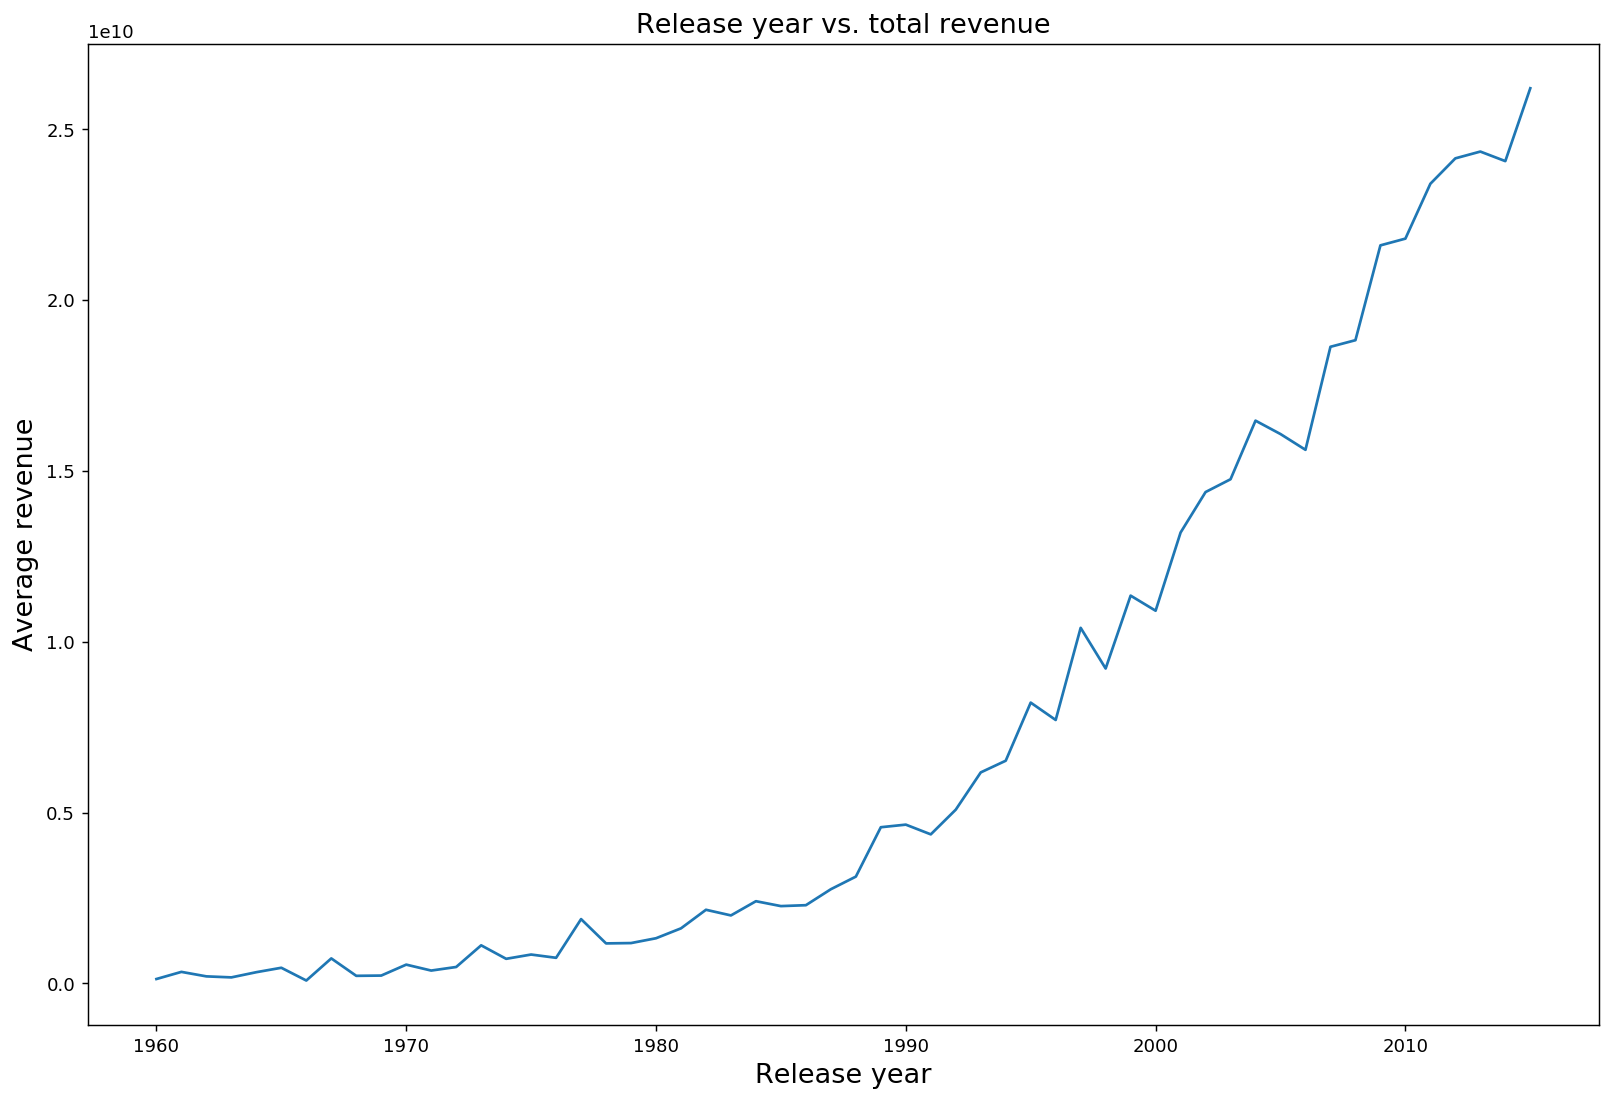

In [29]:
# group release year and get the sum for revenue
revenue_release_year = tmdb_movie_dataset.groupby('release_year')['revenue'].sum()
# define the size of the graph
plt.figure(figsize=(15,10), dpi = 130)
# set label for x axis
plt.xlabel('Release year',fontsize = 15)
# set label for y axis
plt.ylabel('Average revenue',fontsize = 15)
# set title for graph
plt.title("Release year vs. total revenue",fontsize = 15)
# plot the function which i defined above
plt.plot(revenue_release_year)
# plot it
plt.show()

> The graph is heavyly skewed to the left and shows us, that the average revenue is growing very fast and strong.

#### Movie with biggest budget

> Let's see which movie got the biggest budget. Again, i am going to use the idxmax function.

In [30]:
tmdb_movie_dataset.loc[tmdb_movie_dataset['budget'].idxmax()]

id                                                                  46528
popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                          

> This is interesting. I didn't hear of this movie before and if it has had such a big budget, wouldn't i have heard of it? Let's have a closer look at the data. Therefore i am going to query my dataset for the movie id.

In [31]:
# query dataset for id = 46528
tmdb_movie_dataset.query('id == 46528')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2244,46528,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010


> Upon taking a look at the IMDB database on the internet, it is clear that we have a wrong value in our dataset, which can also be found in our original csv file. In fact, the budget for this movie is 42.500.000, but not 425.000.000. As i want to get the right data for my analysis, i decided not to drop that row, but to replace the budget for this entry.

In [32]:
# as we have this budget only once in our dataframe, we can just replace one value by another. 
tmdb_movie_dataset['budget'] =tmdb_movie_dataset['budget'].replace(425000000, 42500000)

> Check if it worked

In [33]:
# query for the id again
tmdb_movie_dataset.query('id == 46528')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2244,46528,0.25054,42500000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010


> Now the movie has the right budget, so we can run our idxmax function for the budget anew. Let's see, which movie has the highest budget now. Note: There might be other entries which have false values, but that can only be seen if they appear in our calculation and we notice them by their (possibly wrong) figures.

In [34]:
# use the idxmax function again to get the movie with the biggest budget after doing the cleaning above
tmdb_movie_dataset.loc[tmdb_movie_dataset['budget'].idxmax()]

id                                                                   1865
popularity                                                        4.95513
budget                                                            3.8e+08
revenue                                                       1.02168e+09
original_title                Pirates of the Caribbean: On Stranger Tides
cast                    Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...
director                                                     Rob Marshall
runtime                                                               136
genres                                           Adventure|Action|Fantasy
production_companies    Walt Disney Pictures|Jerry Bruckheimer Films|M...
release_date                                          2011-05-11 00:00:00
vote_count                                                           3180
vote_average                                                          6.3
release_year                          

> Ok, this sounds way more reasonable. Let's explore the dataset in a different way so that we can see the budget in numbers.

In [35]:
tmdb_movie_dataset.query('id == 1865')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3375,1865,4.95513,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011


#### Mean budget for movies

In [36]:
# calculate the mean for budget
tmdb_movie_dataset['budget'].mean()

37507470.93534823

#### Development of the total budget as of 1960

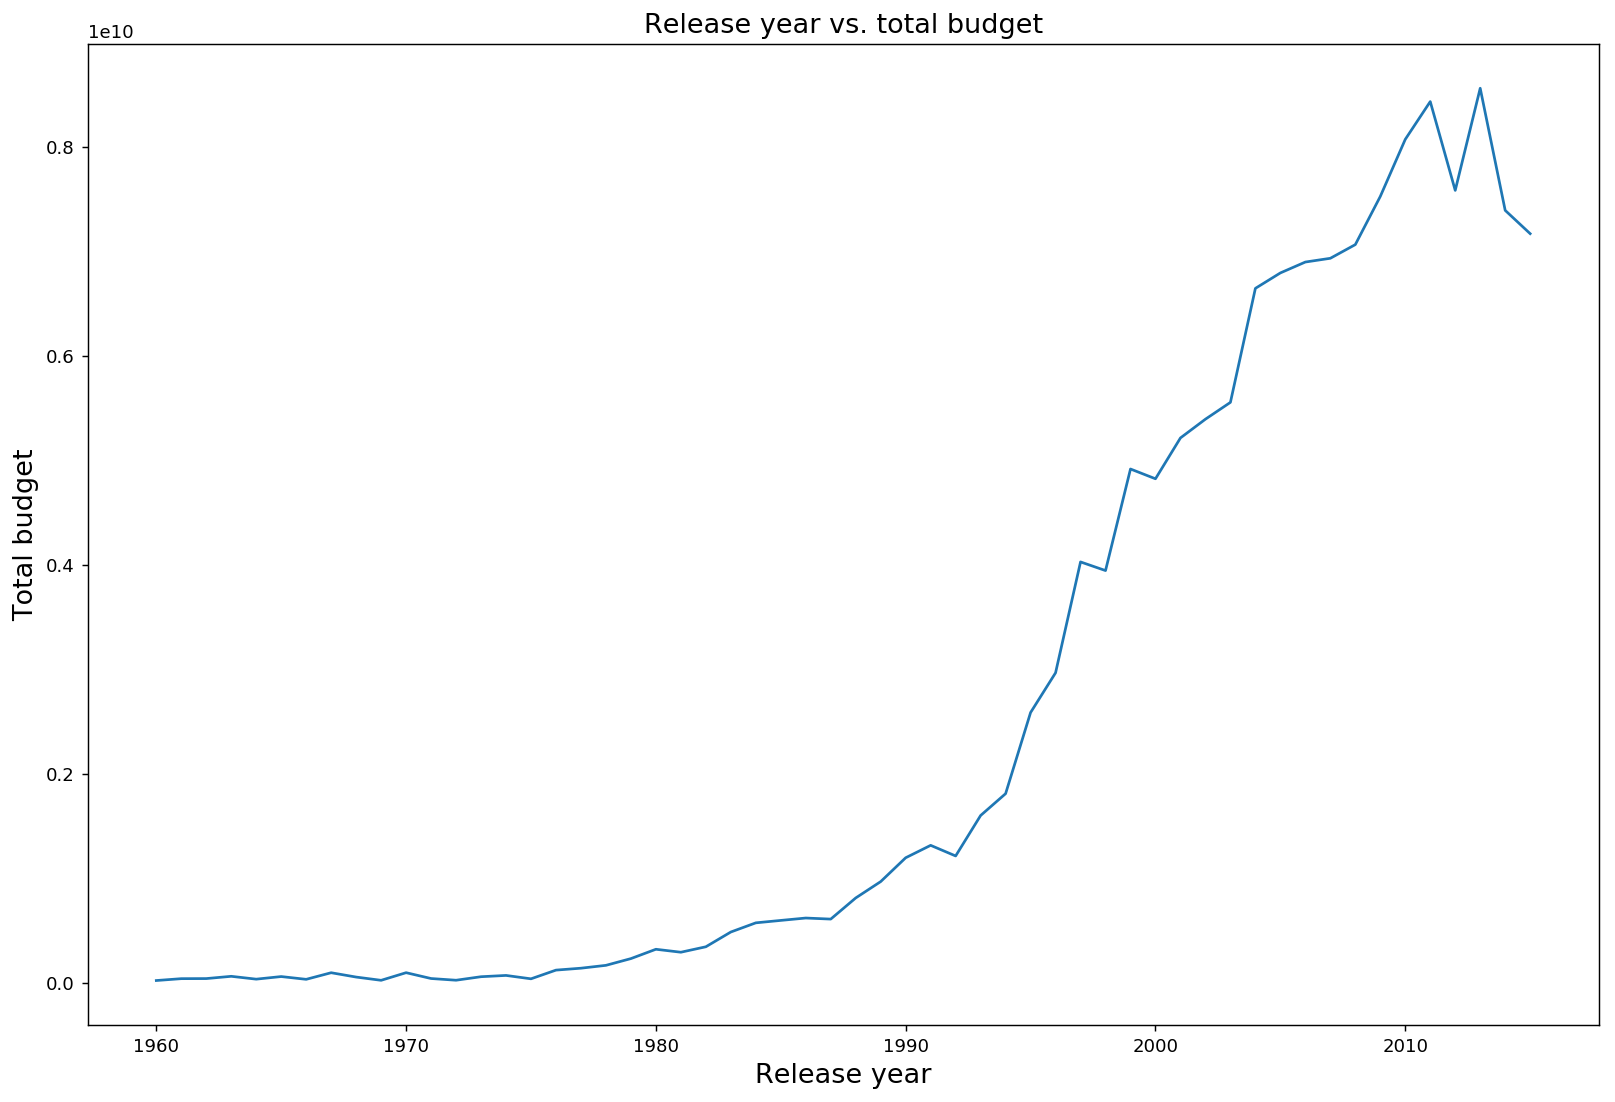

In [37]:
# i am using the same function for plotting the graph like i did before, therefore i am not going to explain every step anew. 
# For explanation, check above.
budget_release_year = tmdb_movie_dataset.groupby('release_year')['budget'].sum()
plt.figure(figsize=(15,10), dpi = 130)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Total budget',fontsize = 15)
plt.title("Release year vs. total budget",fontsize = 15)
plt.plot(budget_release_year)
plt.show()

> The graph is heavyly skewed to the left, but shows peaks in the recent years. Let's explore which release year is responsible for the peak

In [38]:
budget_release_year = tmdb_movie_dataset.groupby('release_year')['budget'].sum()
budget_release_year

release_year
1960    2.080695e+07
1961    3.863700e+07
1962    3.945000e+07
1963    6.111500e+07
1964    3.393516e+07
1965    5.880000e+07
1966    3.226800e+07
1967    9.550000e+07
1968    5.395000e+07
1969    2.284409e+07
1970    9.590195e+07
1971    4.000200e+07
1972    2.366425e+07
1973    5.732700e+07
1974    6.958500e+07
1975    3.710000e+07
1976    1.205000e+08
1977    1.388500e+08
1978    1.661700e+08
1979    2.307000e+08
1980    3.200500e+08
1981    2.917500e+08
1982    3.439000e+08
1983    4.852270e+08
1984    5.730470e+08
1985    5.962756e+08
1986    6.191001e+08
1987    6.089300e+08
1988    8.113000e+08
1989    9.679894e+08
1990    1.196131e+09
1991    1.315000e+09
1992    1.213326e+09
1993    1.600686e+09
1994    1.809807e+09
1995    2.586419e+09
1996    2.966730e+09
1997    4.028287e+09
1998    3.945510e+09
1999    4.917775e+09
2000    4.824200e+09
2001    5.215329e+09
2002    5.394840e+09
2003    5.555837e+09
2004    6.647249e+09
2005    6.794946e+09
2006    6.899218e+09


> Ok, so years 2011 and 2013 are responsible for the peaks. Let's see which 5 movies had the highets budget in 2013 and 2011.

In [39]:
# first, a am query for the year and then sort the values so that i get the five movies with the highest budget.
tmdb_2013 = tmdb_movie_dataset.query('release_year == 2013').sort_values('budget', ascending = False)
print(tmdb_2013.head())

         id  popularity       budget      revenue  \
5508  57201    1.214510  255000000.0   89289910.0   
5431  57158    4.310786  250000000.0  958400000.0   
5432  49521    3.972460  225000000.0  662845518.0   
5520  68728    1.094958  200000000.0  491868548.0   
5444  62211    2.643496  200000000.0  743559607.0   

                           original_title  \
5508                      The Lone Ranger   
5431  The Hobbit: The Desolation of Smaug   
5432                         Man of Steel   
5520           Oz: The Great and Powerful   
5444                  Monsters University   

                                                   cast        director  \
5508  Johnny Depp|Armie Hammer|William Fichtner|Hele...  Gore Verbinski   
5431  Martin Freeman|Ian McKellen|Richard Armitage|K...   Peter Jackson   
5432  Henry Cavill|Amy Adams|Michael Shannon|Diane L...     Zack Snyder   
5520  James Franco|Mila Kunis|Rachel Weisz|Michelle ...       Sam Raimi   
5444  Billy Crystal|John Goodman|St

> Ok, now it get's clearer. The Hobbit has been released this year, so the budget for this blockbuster counts in into the total budget and pushes it up. 

> Let's take a look at 2011. 

In [40]:
tmdb_2011 = tmdb_movie_dataset.query('release_year == 2011').sort_values('budget', ascending = False)
print(tmdb_2011.head())

         id  popularity       budget       revenue  \
3375   1865    4.955130  380000000.0  1.021683e+09   
3394  44912    2.419805  200000000.0  2.198512e+08   
3393  49013    2.454226  200000000.0  5.598524e+08   
3522  38356    0.760503  195000000.0  1.123747e+09   
3418  44826    1.488615  170000000.0  1.857702e+08   

                                   original_title  \
3375  Pirates of the Caribbean: On Stranger Tides   
3394                                Green Lantern   
3393                                       Cars 2   
3522               Transformers: Dark of the Moon   
3418                                         Hugo   

                                                   cast  \
3375  Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...   
3394  Ryan Reynolds|Blake Lively|Peter Sarsgaard|Tim...   
3393  Larry the Cable Guy|Owen Wilson|Michael Caine|...   
3522  Shia LaBeouf|John Malkovich|Ken Jeong|Frances ...   
3418  Asa Butterfield|ChloÃ« Grace Moretz|Ben Kingsl...   

 

> Alright, again, we have quite some blockbusters appearing in the top 5 in terms of budget in 2013, so that will push the total budget of this year as well.

#### Movie with the lowest budget

In [41]:
tmdb_movie_dataset.loc[tmdb_movie_dataset['budget'].idxmin()]

id                                                                  39964
popularity                                                       0.090186
budget                                                                  1
revenue                                                               100
original_title                                               Lost & Found
cast                    David Spade|Sophie Marceau|Ever Carradine|Step...
director                                                     Jeff Pollack
runtime                                                                95
genres                                                     Comedy|Romance
production_companies             Alcon Entertainment|Dinamo Entertainment
release_date                                          1999-04-23 00:00:00
vote_count                                                             14
vote_average                                                          4.8
release_year                          

#### Movie with the longest runtime

In [42]:
tmdb_movie_dataset.loc[tmdb_movie_dataset['runtime'].idxmax()]

id                                                                  43434
popularity                                                       0.534192
budget                                                            1.8e+07
revenue                                                            871279
original_title                                                     Carlos
cast                    Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                                  Olivier Assayas
runtime                                                               338
genres                                       Crime|Drama|Thriller|History
production_companies    Egoli Tossell Film AG|Canal+|Arte France|Films...
release_date                                          2010-05-19 00:00:00
vote_count                                                             35
vote_average                                                          6.2
release_year                          

> Taking a look at the movie with the longest runtime, it get's clearer that the imdb database also contains traditional movies, but also series and tv mini series. The movie with the longest runtime is, in fact, a tv mini series named "Carlos".

#### Movie with the shortest runtime

In [43]:
tmdb_movie_dataset.loc[tmdb_movie_dataset['runtime'].idxmin()]

id                                                                  24914
popularity                                                       0.208637
budget                                                                 10
revenue                                                                 5
original_title                                                Kid's Story
cast                    Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director                                              Shinichiro Watanabe
runtime                                                                15
genres                                          Science Fiction|Animation
production_companies                                          Studio 4Â°C
release_date                                          2003-06-02 00:00:00
vote_count                                                             16
vote_average                                                          6.8
release_year                          

#### Average runtime for movies

In [44]:
tmdb_movie_dataset['runtime'].mean()

109.35111695137977

#### Development of average movie runtime since 1960

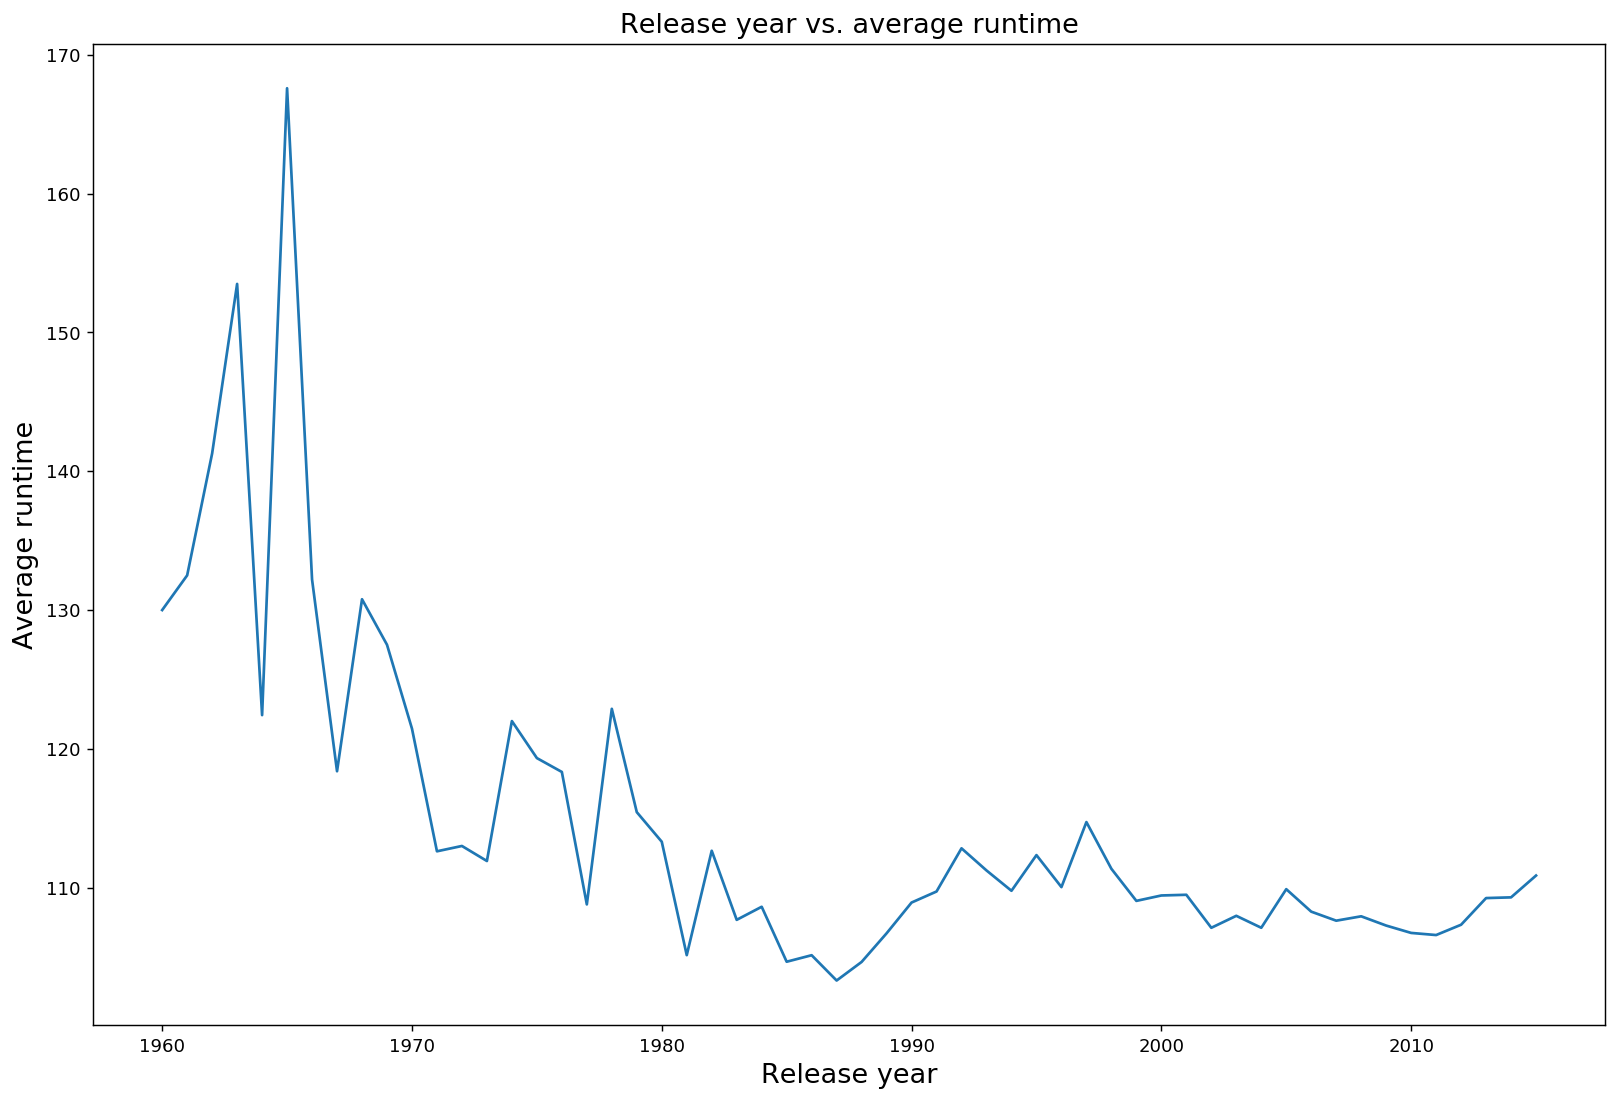

In [45]:
avg_runtime_release_year = tmdb_movie_dataset.groupby('release_year')['runtime'].mean()
plt.figure(figsize=(15,10), dpi = 130)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Average runtime',fontsize = 15)
plt.title("Release year vs. average runtime",fontsize = 15)
plt.plot(avg_runtime_release_year)
plt.show()

> This graph is skewed to the right, stating that the average runtime has become shorter over the course of the years.

### Highest and lowest profit

> In order to analyze, which movies have the highest and lowest profit, we need to calculate the profit first and add it to our dataframe. 

In [46]:
# using the insert function, i am going to add the result of the revenue - budget to the dataframe. 
tmdb_movie_dataset.insert(2,'profit_earned_by_movie',tmdb_movie_dataset['revenue']-tmdb_movie_dataset['budget'])
tmdb_movie_dataset.head(10)
# Let's have a look if the column has been added to our dataframe. 

,id,popularity,profit_earned_by_movie,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
5,281957,9.110700,3.979505e+08,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015
6,87101,8.654359,2.856035e+08,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015
7,286217,7.667400,4.873803e+08,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015
8,211672,7.404165,1.082731e+09,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015
9,150540,6.326804,6.787086e+08,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015


#### Movie with the highest profit

In [47]:
tmdb_movie_dataset.loc[tmdb_movie_dataset['profit_earned_by_movie'].idxmax()]

id                                                                    19995
popularity                                                          9.43277
profit_earned_by_movie                                          2.54451e+09
budget                                                             2.37e+08
revenue                                                         2.78151e+09
original_title                                                       Avatar
cast                      Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                      James Cameron
runtime                                                                 162
genres                             Action|Adventure|Fantasy|Science Fiction
production_companies      Ingenious Film Partners|Twentieth Century Fox ...
release_date                                            2009-12-10 00:00:00
vote_count                                                             8458
vote_average

> Again, we have a winner. Avatar didn't only have the highest revenue, but is also the most profitable movie as well.

#### Movie with lowest profit

In [48]:
tmdb_movie_dataset.loc[tmdb_movie_dataset['profit_earned_by_movie'].idxmin()]

id                                                                    57201
popularity                                                          1.21451
profit_earned_by_movie                                          -1.6571e+08
budget                                                             2.55e+08
revenue                                                         8.92899e+07
original_title                                              The Lone Ranger
cast                      Johnny Depp|Armie Hammer|William Fichtner|Hele...
director                                                     Gore Verbinski
runtime                                                                 149
genres                                             Action|Adventure|Western
production_companies      Walt Disney Pictures|Jerry Bruckheimer Films|I...
release_date                                            2013-07-03 00:00:00
vote_count                                                             1607
vote_average

#### Average profit for movies

In [49]:
tmdb_movie_dataset['profit_earned_by_movie'].mean()

71465921.05624178

#### Development of profit as of 1960

> Let's see how the profit for movies developed since 1960.

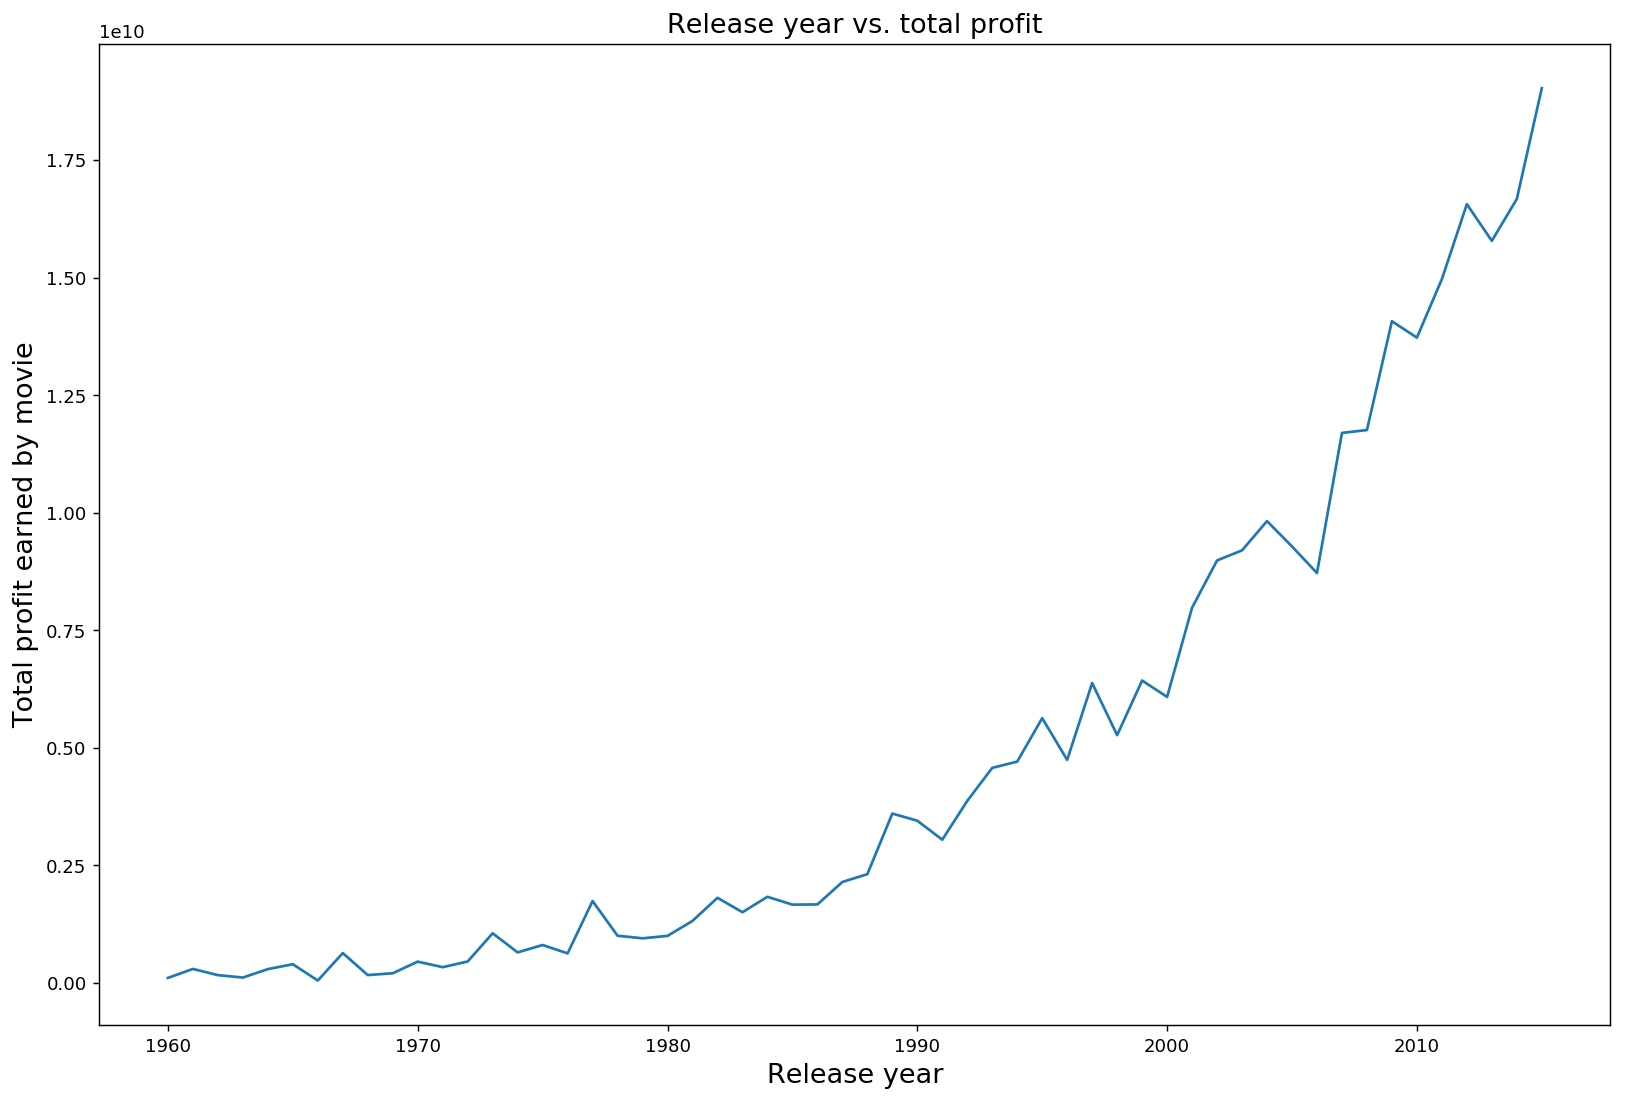

In [50]:
profit_release_year = tmdb_movie_dataset.groupby('release_year')['profit_earned_by_movie'].sum()
plt.figure(figsize=(15,10), dpi = 130)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Total profit earned by movie',fontsize = 15)
plt.title("Release year vs. total profit",fontsize = 15)
plt.plot(profit_release_year)
plt.show()

> This graph is skewed to the left as well, showing that the total profit gets bigger and bigger over the course of the years.

### Releases per year since 1960

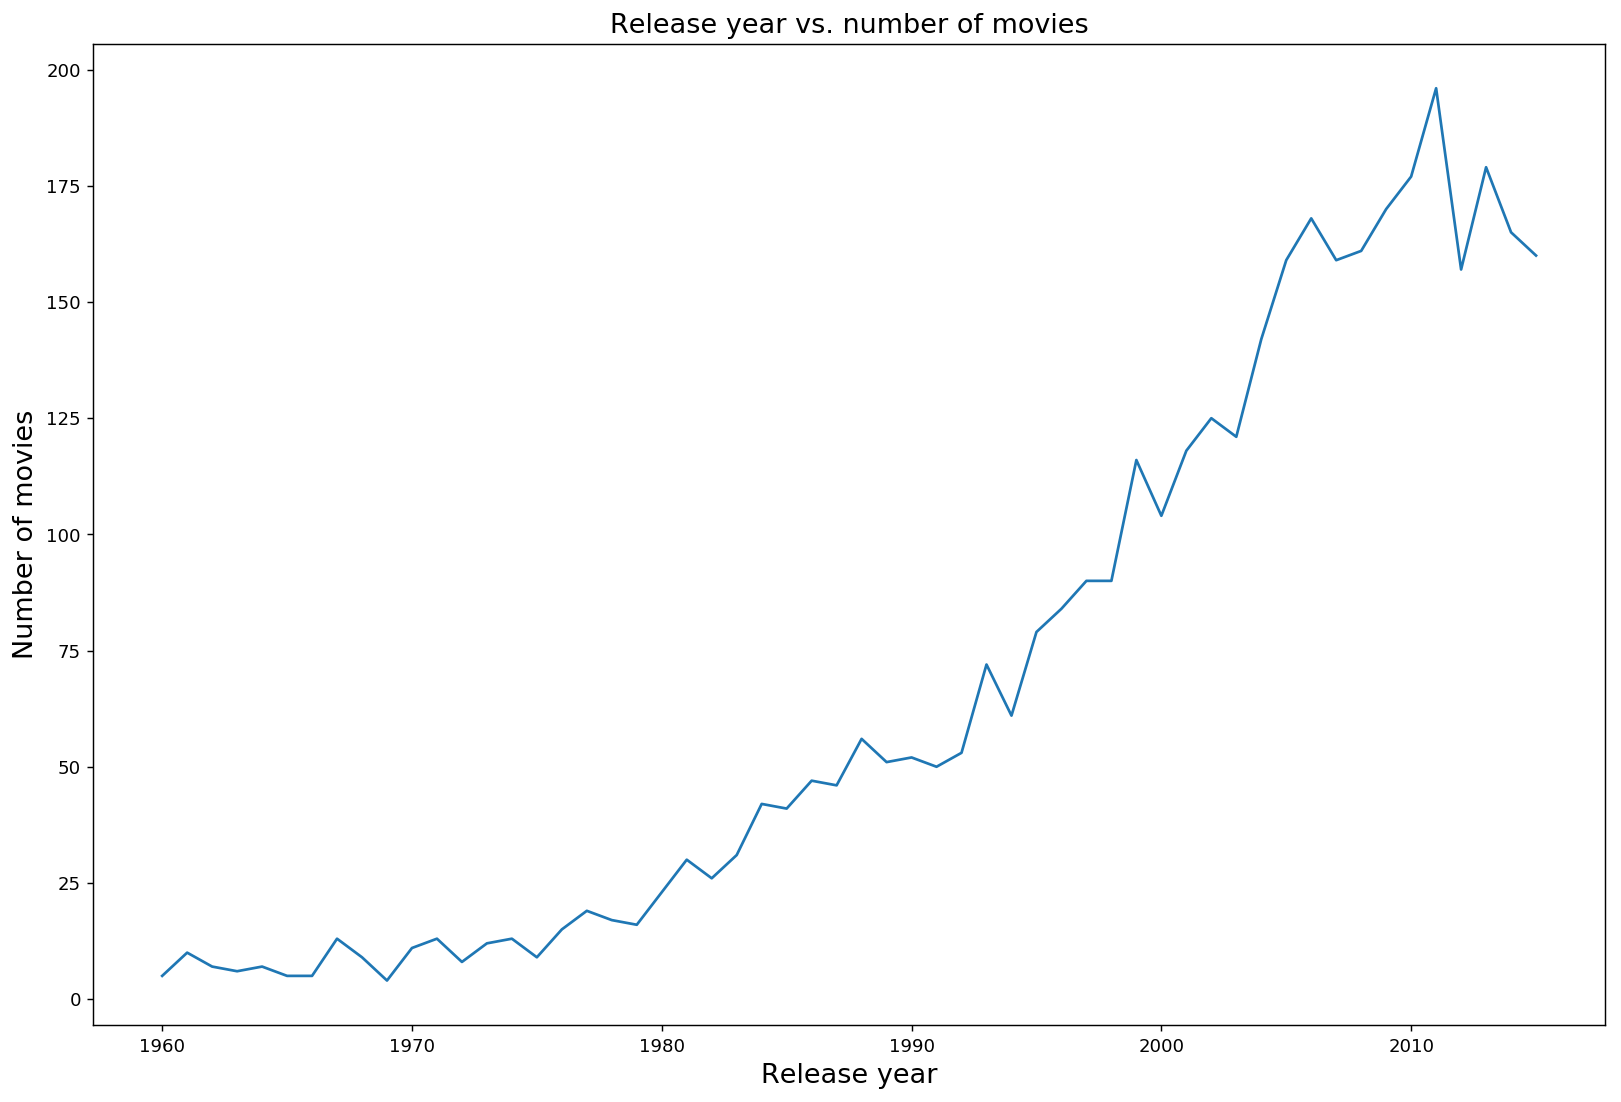

In [51]:
# group release year and get the sum for revenue
number_releases = tmdb_movie_dataset.groupby('release_year')['release_year'].count()
# define the size of the graph
plt.figure(figsize=(15,10), dpi = 130)
# set label for x axis
plt.xlabel('Release year',fontsize = 15)
# set label for y axis
plt.ylabel('Number of movies',fontsize = 15)
# set title for graph
plt.title("Release year vs. number of movies",fontsize = 15)
# plot the function which i defined above
plt.plot(number_releases)
# plot it
plt.show()

> The profit graph is skewed to the left, so does this one, which is for the number of releases per year. As the number of releases rise, so does the total profit.

#### Development of average profit as of 1960

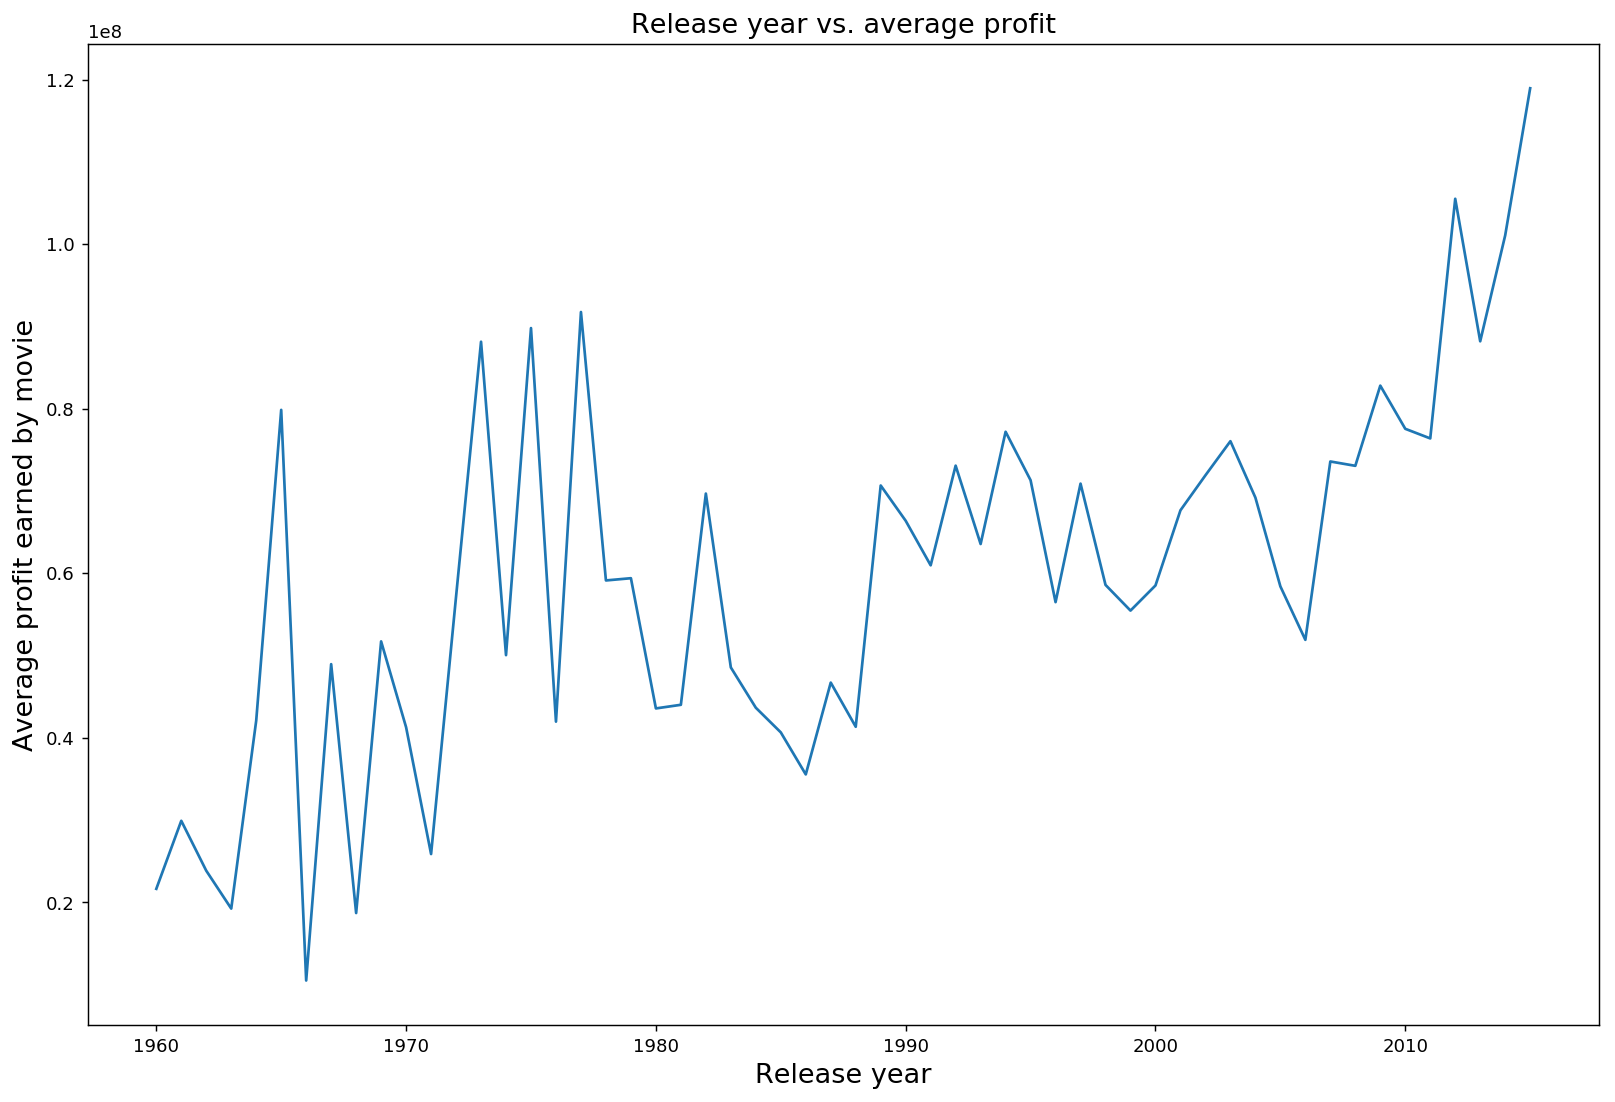

In [52]:
avg_profit_release_year = tmdb_movie_dataset.groupby('release_year')['profit_earned_by_movie'].mean()
plt.figure(figsize=(15,10), dpi = 130)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Average profit earned by movie',fontsize = 15)
plt.title("Release year vs. average profit",fontsize = 15)
plt.plot(avg_profit_release_year)
plt.show()

> The graph is slightly skewed to the left. In the last years, the movies became more profitabel in average, but looking at the 80s, 90s and early 2000, the average profit wasn't that high. In fact, there are years in the 60s and the 70s, where the average profit has been higher than in the years to come.

> Furthermore, you can see that the average profit uses to rise one year and fall back the next, stating that there seem to be cycles, which are maybe connected to the releases of bluckbusters.

<a id='correlation_explore'></a>
### Correlation Exploration

> Using the corr function in different ways, we are going to investigate if there are correlations beteen the different factors. First, we start with creating a table which shows the correlation coefficent between each column in our dataset, except if the columns contain strings (like cast, production_companies or genres).

In [53]:
# get the correlation coefficent for all columns which have values. 
tmdb_movie_dataset.corr()

,id,popularity,profit_earned_by_movie,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,0.188179,0.002964,-0.029782,-0.004503,-0.036166,0.110555,-0.000700,0.491245
popularity,0.188179,1.000000,0.595209,0.450142,0.613793,0.213690,0.779125,0.319927,0.175991
profit_earned_by_movie,0.002964,0.595209,1.000000,0.539487,0.980048,0.219249,0.728128,0.261216,0.090124
budget,-0.029782,0.450142,0.539487,1.000000,0.696080,0.263601,0.562152,0.022506,0.273100
revenue,-0.004503,0.613793,0.980048,0.696080,1.000000,0.249178,0.753574,0.228051,0.141317
runtime,-0.036166,0.213690,0.219249,0.263601,0.249178,1.000000,0.273464,0.359173,-0.113488
vote_count,0.110555,0.779125,0.728128,0.562152,0.753574,0.273464,1.000000,0.389853,0.209688
vote_average,-0.000700,0.319927,0.261216,0.022506,0.228051,0.359173,0.389853,1.000000,-0.135646
release_year,0.491245,0.175991,0.090124,0.273100,0.141317,-0.113488,0.209688,-0.135646,1.000000


#### Do movies with a longer runtime generate more profit in average?

> First, i am going to plot the runtime against the average profit. 

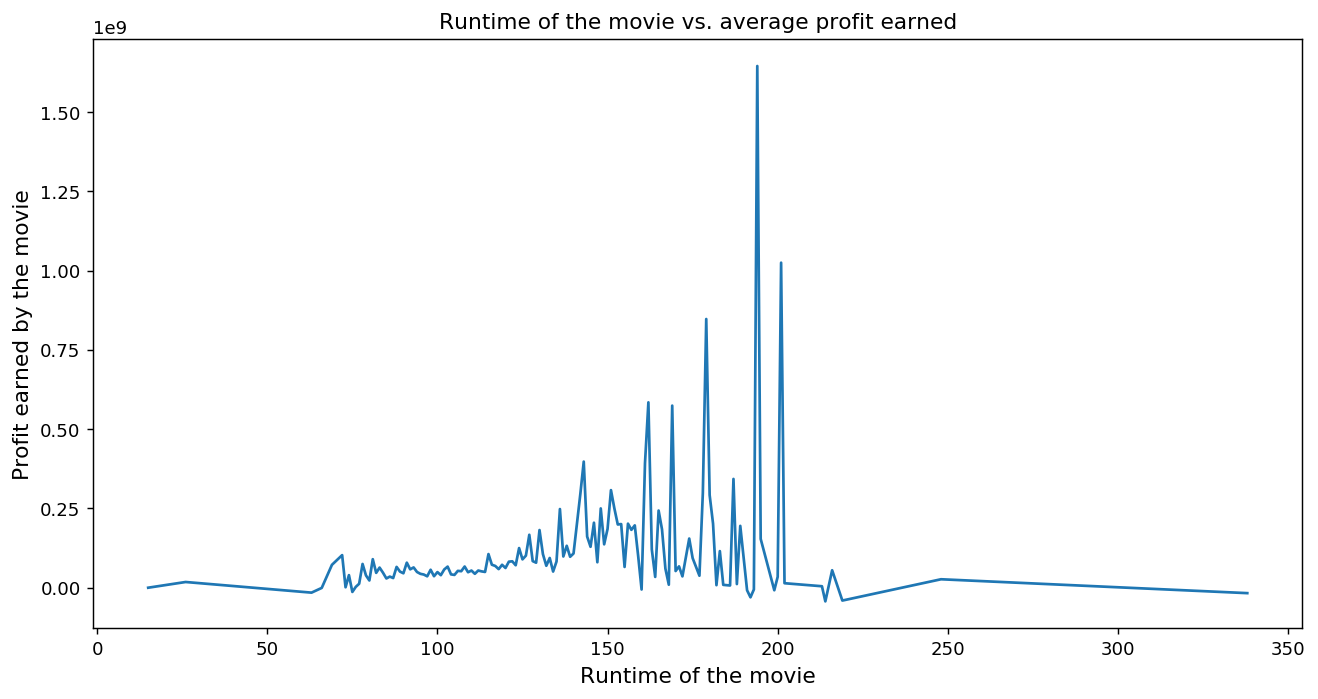

In [54]:
# Group the data by runtime and calculate the average profit.
profit_runtime = tmdb_movie_dataset.groupby('runtime')['profit_earned_by_movie'].mean()

# define the size of the graph
plt.figure(figsize=(12,6), dpi = 130)

# define label for x axis and the size of the font
plt.xlabel('Runtime of the movie', fontsize = 12)
# define the label for the y axis and the size of the font
plt.ylabel('Profit earned by the movie', fontsize = 12)
# define the title
plt.title('Runtime of the movie vs. average profit earned')

# plot the graph by addressing the formula above
plt.plot(profit_runtime)

# order to show the plot
plt.show()

> The graph is skewed to the left. So it looks like that movies with a longer runtime are making more profit in average. 
But let's see if there really is a correlation between the runtime and the profit earned.

In [55]:
# calculate the correlation coefficent between runtime and profit earned
tmdb_movie_dataset['runtime'].corr(tmdb_movie_dataset['profit_earned_by_movie'])

0.21924850794868719

> According to the calculation, there is a correlation coefficent of 0.22. While we can conclude that this still is a positive correlation, it is not perfect positive (which would be if we had the value of +1). 

> In order to get more insights, let's plot this to a graph.

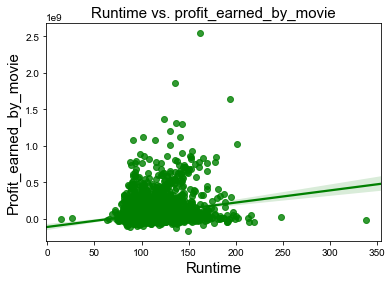

In [56]:
# define, which column we are using for plotting on the x and on the y axis and define the color we are using for the plot.
ax = sns.regplot(x=tmdb_movie_dataset['runtime'], y=tmdb_movie_dataset['profit_earned_by_movie'],color='g')
# set the title for the graph
ax.set_title("Runtime vs. profit_earned_by_movie",fontsize=15)
# set the label for the x axis and define the font size
ax.set_xlabel("Runtime",fontsize=15)
# set the label for the y axis and define the font size
ax.set_ylabel("Profit_earned_by_movie",fontsize=15)
#set size of our grapoh
sns.set(rc={'figure.figsize':(20,10)})
# set the style of our graph. Here we are using a grid with a white background
sns.set_style("whitegrid")
# define, that we are want the correlation coefficent to be plotted into the graph (line).
dataset_correlation = tmdb_movie_dataset.corr()

> Taking a look at this plot, we can see that there are quite some movies with a small runtime but a high profit, as well as movies with a long runtime and low profit. In this case, the outliers are ore with movies which have a high profit but a shorter runtime.

#### Do movies with a longer runtime are more popular?

> Again, let's plot the runtime vs. the popularity so that we can see if movies with a longer runtime have a higher average popularity.

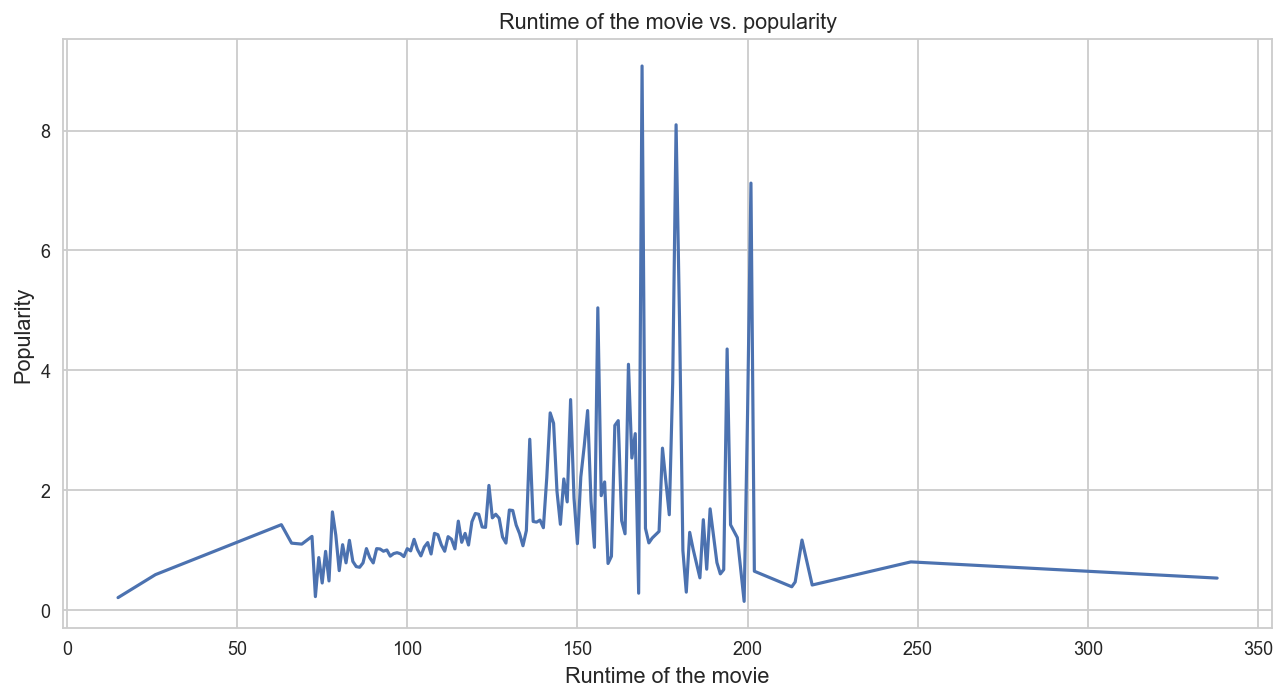

In [57]:
profit_runtime = tmdb_movie_dataset.groupby('runtime')['popularity'].mean()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Runtime of the movie', fontsize = 12)
plt.ylabel('Popularity', fontsize = 12)
plt.title('Runtime of the movie vs. popularity')
plt.plot(profit_runtime)
plt.show()

> We can see that the graph is skewed to the left as well, indicating that movies with a longer runtime have a higher popularity in average.

> But let's take a look at the correlation coefficent as well.

In [58]:
tmdb_movie_dataset['runtime'].corr(tmdb_movie_dataset['popularity'])

0.2136903062554136

> As before, we can conclude that we still have a positive correlation, but it is quite far away from perfect positive. Let's plot it as well to see outliers.

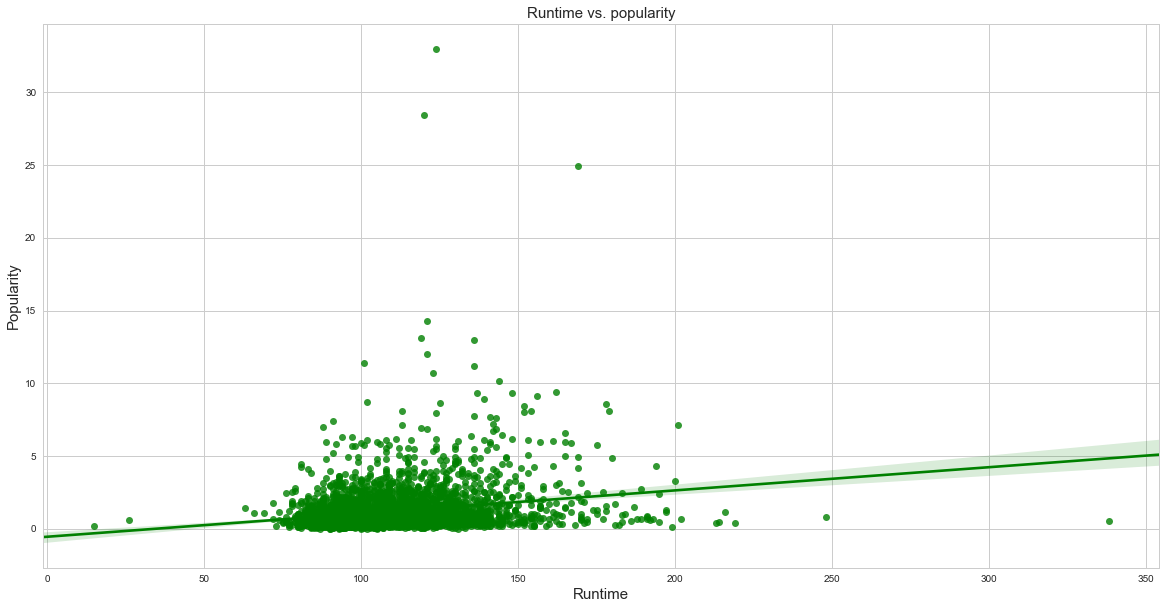

In [59]:
ax = sns.regplot(x=tmdb_movie_dataset['runtime'], y=tmdb_movie_dataset['popularity'],color='g')

ax.set_title("Runtime vs. popularity",fontsize=15)
ax.set_xlabel("Runtime",fontsize=15)
ax.set_ylabel("Popularity",fontsize=15)
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

dataset_correlation = tmdb_movie_dataset.corr()

> Taking a look at this plot, we can see that there are quite some movies with a small runtime but a high popularity, as well as movies with a long runtime and low popularity. In this case, the outliers are ore with movies which have a high popularity but a medium runtime.

> This plot implies that the runtime has only a week correlation with popularity.

#### Do movies with a higher popularity generate more revenue?

> This time, we are directly taking a look at the correlation coefficent. 

In [60]:
tmdb_movie_dataset['popularity'].corr(tmdb_movie_dataset['revenue'])

0.61379277571144319

> We can conclude that we have a strong positive correlation, but it still isn't perfect. Let's plot it as well.

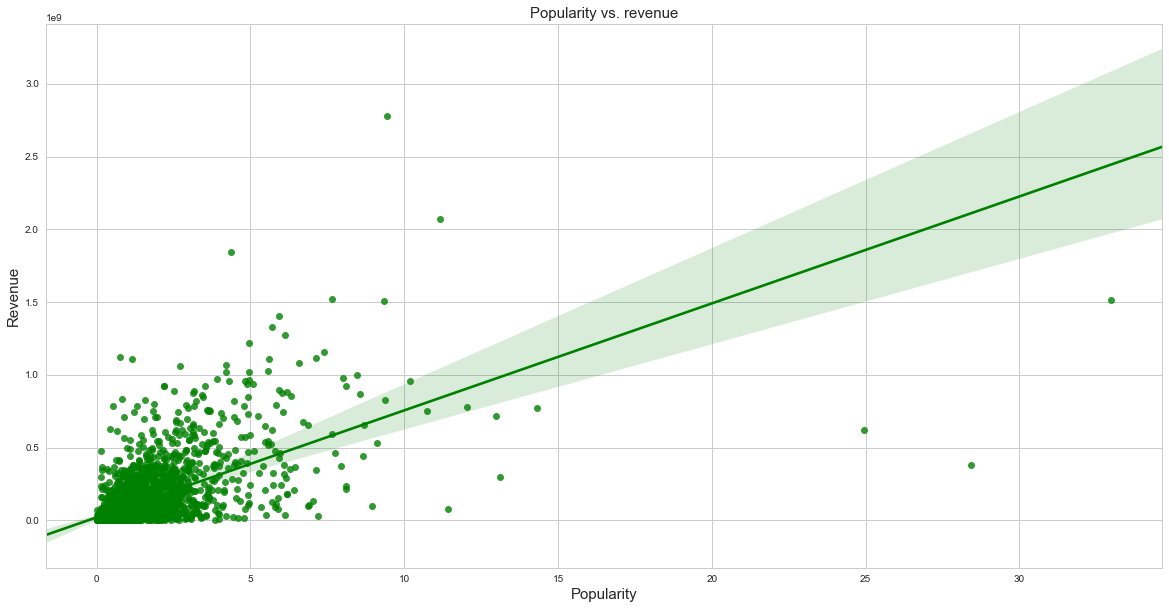

In [61]:
ax = sns.regplot(x=tmdb_movie_dataset['popularity'], y=tmdb_movie_dataset['revenue'],color='g')

ax.set_title("Popularity vs. revenue",fontsize=15)
ax.set_xlabel("Popularity",fontsize=15)
ax.set_ylabel("Revenue",fontsize=15)
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

dataset_correlation = tmdb_movie_dataset.corr()

> Taking a lot at the calculation of the correlation coefficent we did before and the plot we did just now, we can conclude that a higher popularity correlates positively with higher revenue. 

> But still, as it isn't a perfect positive correlation, as we have outliers, wich are mostly with higher revenue and lower popularity. In addition, we have some movies wich are really popular, but generetad relativly low revenue, as well as movies which generated high revenue but weren't as popular as others.

> All in all, this implies that a higher population strongly correlates with a higher revenue, but there might be other factors which have an impact on the revenue.

#### Do movies with a higher popularity generate more profit?

> Again, we are having a look at the correlation coefficent.

In [62]:
tmdb_movie_dataset['popularity'].corr(tmdb_movie_dataset['profit_earned_by_movie'])

0.59520856435124281

> Again, we have a strong positive correlation, but not a perfect one. For more insights, we are going to plot it again:

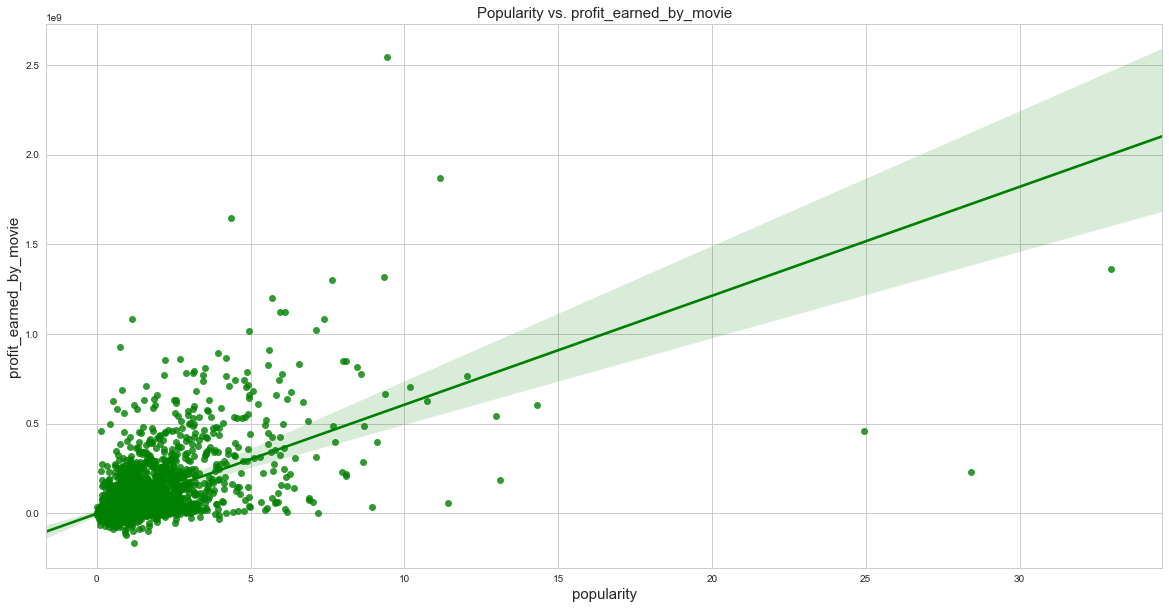

In [63]:
ax = sns.regplot(x=tmdb_movie_dataset['popularity'], y=tmdb_movie_dataset['profit_earned_by_movie'],color='g')

ax.set_title("Popularity vs. profit_earned_by_movie",fontsize=15)
ax.set_xlabel("popularity",fontsize=15)
ax.set_ylabel("profit_earned_by_movie",fontsize=15)

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

dataset_correlation = tmdb_movie_dataset.corr()

> Again, we have a strong positive correlation between popularity and profit earned, but the coefficent is lower than the one for revenue and popularity.

> This implies that a high popularity strongly correlates with high profit. But again, we have no perfect positive correlation, so there might be other factors which have an influence on the profit.

#### Do movies become more popular over time?

Let's see if movies become more popular each and every year. 

In [64]:
tmdb_movie_dataset['release_year'].corr(tmdb_movie_dataset['popularity'])

0.1759908662895191

> According to the caclucation, there is only a week positive correlation between release year and popularity. But still, it is positive.. Let's plot that as well.

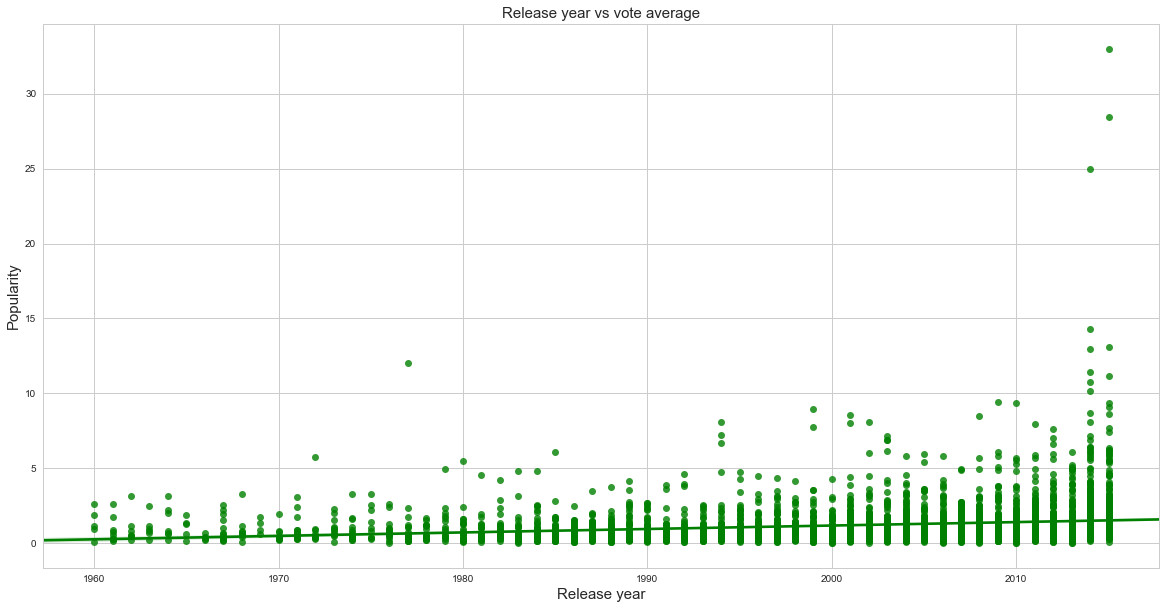

In [65]:

ax = sns.regplot(x=tmdb_movie_dataset['release_year'], y=tmdb_movie_dataset['popularity'],color='g')

ax.set_title("Release year vs vote average",fontsize=15)
ax.set_xlabel("Release year",fontsize=15)
ax.set_ylabel("Popularity",fontsize=15)

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

dataset_correlation = tmdb_movie_dataset.corr()

> As you can see, we have only a slight uphill line, confirming that we only have a week positive correlation. This implies, that the release year correlates with the movies popularity, but there might be other factors which have a higher impact on popularity.

#### Do movies with a higher budget get more revenue?

> Let's see if movies with a higher budget get more revenue.

In [66]:
tmdb_movie_dataset['budget'].corr(tmdb_movie_dataset['revenue'])

0.69607965173384334

> There is a strong positive correlation between budget and revenue. Let's get that into a plot.

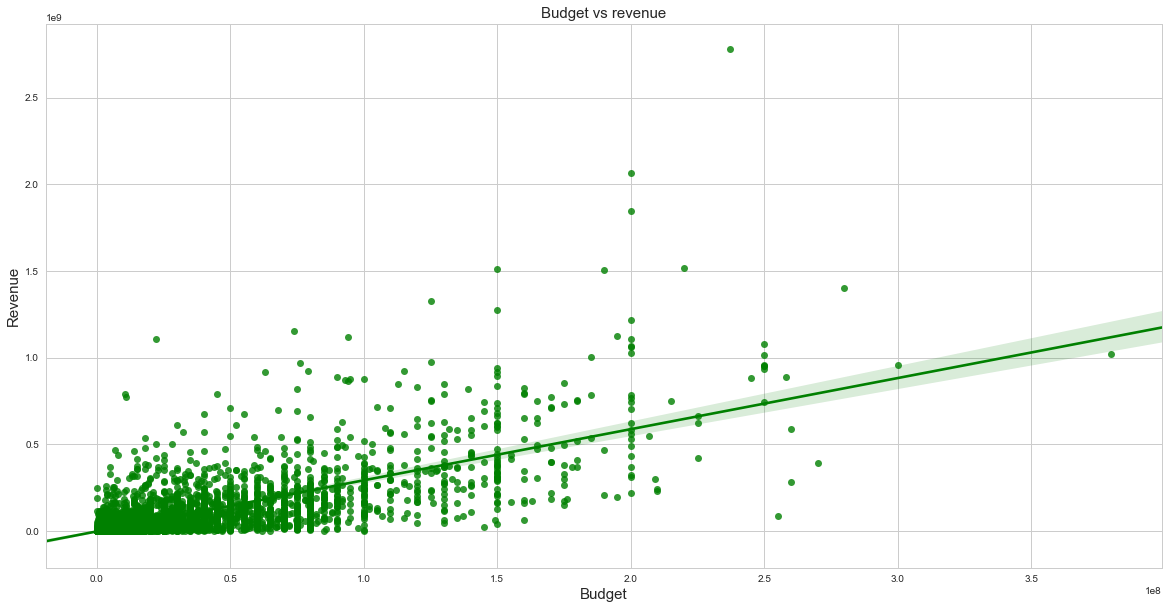

In [67]:

ax = sns.regplot(x=tmdb_movie_dataset['budget'], y=tmdb_movie_dataset['revenue'],color='g')

ax.set_title("Budget vs revenue",fontsize=15)
ax.set_xlabel("Budget",fontsize=15)
ax.set_ylabel("Revenue",fontsize=15)

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

dataset_correlation = tmdb_movie_dataset.corr()

> This graph and the calcuation imply that there is a strong correlation and that movies with a higher budget tend to generate more revenue. But the correlation isn't perfect and we do have outliers with movies, which have a higher budget but a low(er) revenue.

#### Do movies become more profitable over time?

> Let's see if movies become more profitable each and every year (increasing release year). 

In [68]:
tmdb_movie_dataset['release_year'].corr(tmdb_movie_dataset['profit_earned_by_movie'])

0.090123874806135498

> This time, we have a correlation coefficent which is almost zero. This implies, that there is almost no correlation between release year and profit earned. Let's get that confirmed by plotting it.

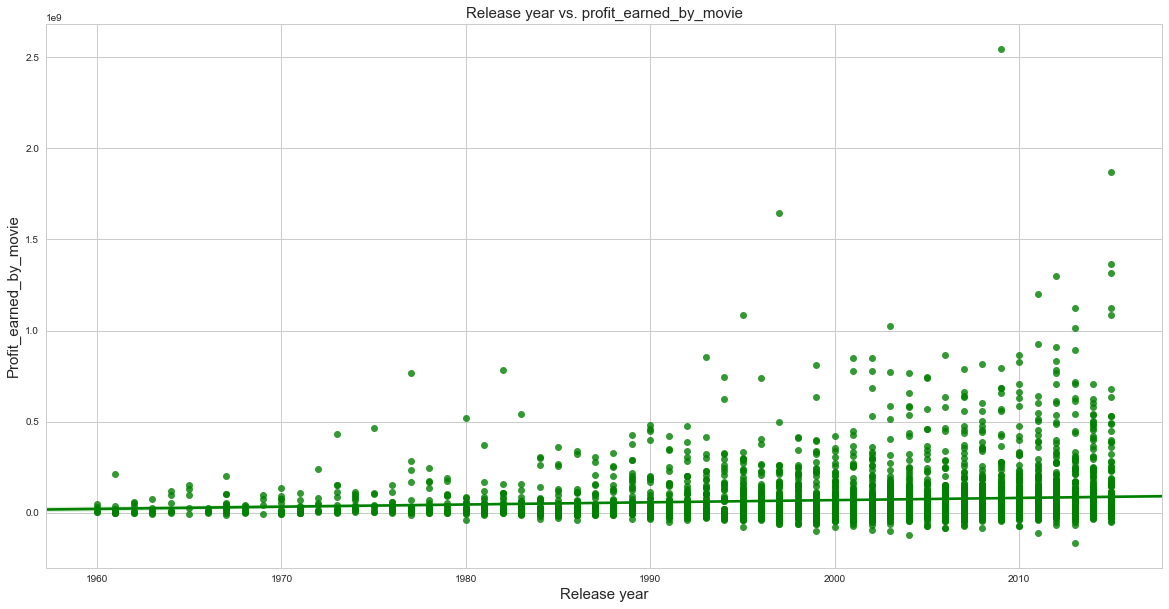

In [69]:
ax = sns.regplot(x=tmdb_movie_dataset['release_year'], y=tmdb_movie_dataset['profit_earned_by_movie'],color='g')

ax.set_title("Release year vs. profit_earned_by_movie",fontsize=15)
ax.set_xlabel("Release year",fontsize=15)
ax.set_ylabel("Profit_earned_by_movie",fontsize=15)

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

dataset_correlation = tmdb_movie_dataset.corr()

> The graph shows very nice, that there is almost no correlation, as we only have a development which is very week going uphill, being almost horizontal. This implies, that the there is close to non correlation between release year and profit.

<a id='monthly_distribution'></a>
### Explore monthly distribution

> First, we are going to take a look on the number of movies released per year. After that, we are taking a look on the distribution of releases per month and find out, if there might be a preffered month for movie releases.

> For starters, let's plot the development movie releases since 1960.

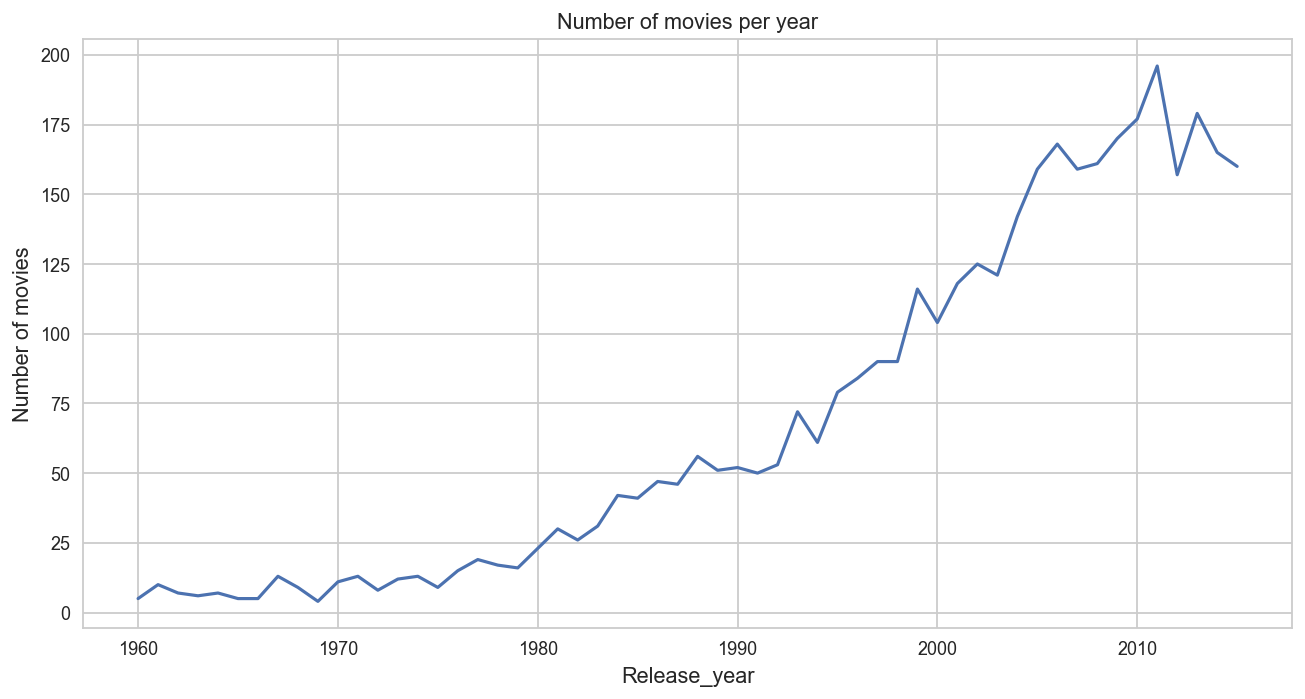

In [70]:
number_movies_year = tmdb_movie_dataset.groupby('release_year').count()['id']

plt.figure(figsize=(12,6), dpi = 130)

plt.xlabel('Release_year', fontsize = 12)
plt.ylabel('Number of movies', fontsize = 12)
plt.title('Number of movies per year')

plt.plot(number_movies_year)

plt.show()

> This graph is skewed to the right, stating that over the course of the years, the number of movies releases is rising. Since the early 90s, the number of movies released is rising faster, which might be connected to movies / cinema and tv becoming more popular and tvs becoming part of more and more households.

#### Which month has the most movie releases?

> Let's find out, which month is the best in terms of movie releases. In order to do that, we first have to create an index and count the number of values for each month. After that, we are going to plot it into a bar chart.

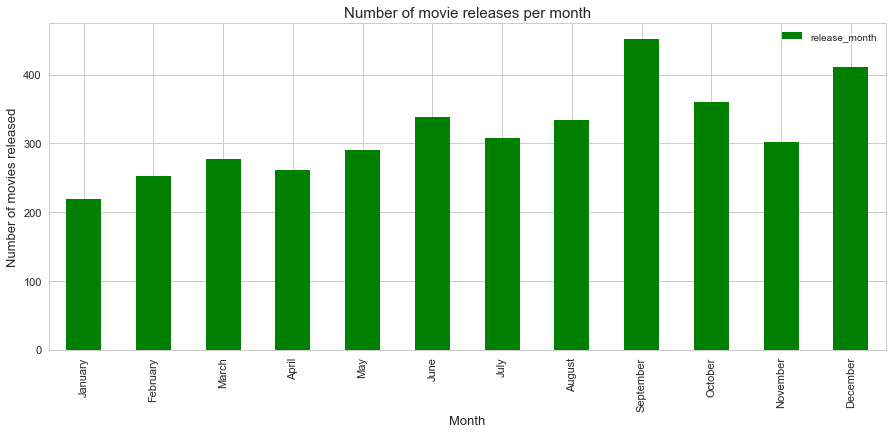

In [71]:
# address the release date column, get the month out of datetype and store this into a new variable
month_movie_release = tmdb_movie_dataset['release_date'].dt.month

# count the values and sort the index
release_numbers = month_movie_release.value_counts().sort_index()
# create the index with the following columns.
months=['January','February','March','April','May','June','July','August','September','October','November','December']
release_numbers = pd.DataFrame(release_numbers)
release_numbers['month'] = months

#rename columns from release date to release month
release_numbers.rename(columns = {'release_date':'release_month'},inplace=True)
# plot the graph. define x axis, type of graph we are going to use, as well as the graph size and the colour of the bar
release_numbers.plot(x='month',kind='bar',fontsize = 11,figsize=(15,6), color="g")

plt.title('Number of movie releases per month',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movies released',fontsize = 13)
sns.set_style("whitegrid")

> The month with the most movie releases is September, followed by December and October. The first quarter of a year seems to be less popular for movie releases. 

#### Which month gets the most profit?

> We just saw, that the most movies are released in September or December, followed by October and June. Let's see which month are the best in terms of total profit. We are using the same formula for calculation and plotting lik we did above.

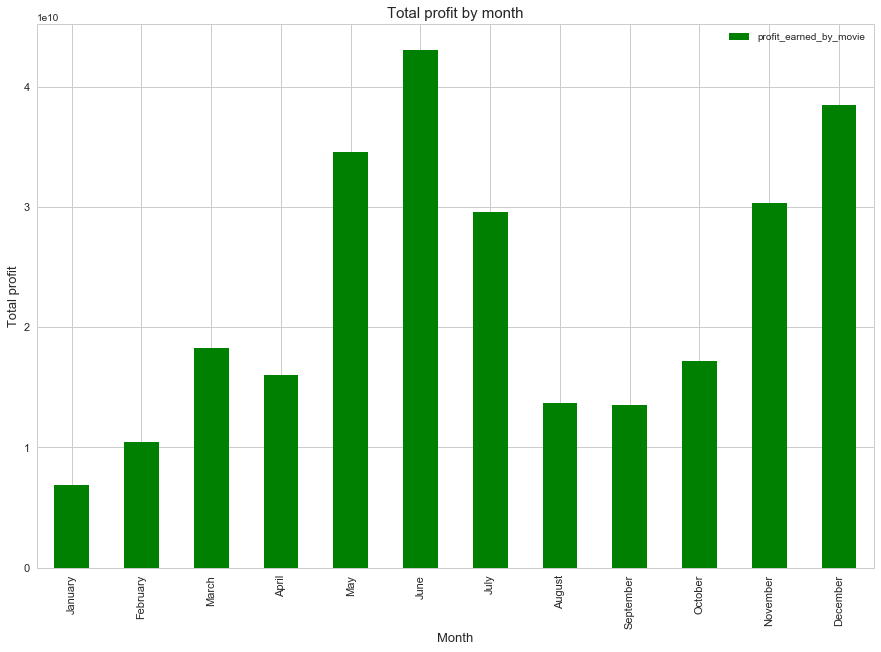

In [72]:
month_movie_release = pd.DataFrame(month_movie_release)

month_movie_release.rename(columns = {'release_date':'release_month'},inplace=True)

month_movie_release['profit_earned_by_movie'] = tmdb_movie_dataset['profit_earned_by_movie']

total_profit  = month_movie_release.groupby('release_month').sum()
total_profit['month'] = months

total_profit.plot(x='month',kind='bar',figsize = (15,10),fontsize=11, color="g")

plt.title('Total profit by month',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Total profit',fontsize = 13)
sns.set_style("whitegrid")

> According to this bar chart, June is the best month in terms of total profit, followed by December and May. So it seems that more movies released in one month means more total profit. There might be other factors, which have it's influence here.

#### Is the release month responsible for more or less profit?

> After taking a look at the bar charts above, let's calculate the correlation coefficient between release month and profit earned in order to see, if the month of release might have an impact on the profit.

In [73]:
month_movie_release['release_month'].corr(month_movie_release['profit_earned_by_movie'])

0.033879066469305677

> We have a very weak correlation coefficent, implying that there is almost none correlation between release month and profit earned and that other factors might be far more import for profit than the month of release. Remember: The release year also only had a weak correlation coefficent, so "time" of release doesn't seem to have a significant impact on profit.

#### Which month is the most popular in average?

> We already looked the number of movies released per month, as well as the profit. At last, let's have a look at the distribution of popularity on monthly basis and see, if we have a stronger correlation.

> Let's plot it the average popularity by month into a bar chart.

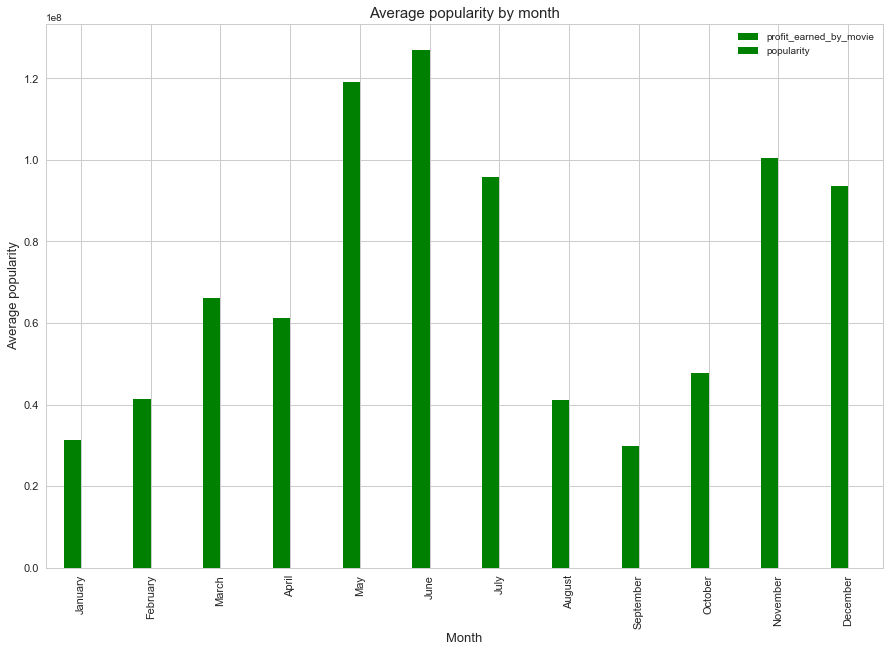

In [74]:
month_movie_release = pd.DataFrame(month_movie_release)

month_movie_release.rename(columns = {'release_date':'release_month'},inplace=True)

month_movie_release['popularity'] = tmdb_movie_dataset['popularity']

avg_popularity  = month_movie_release.groupby('release_month').mean()
avg_popularity['month'] = months

avg_popularity.plot(x='month',kind='bar',figsize = (15,10),fontsize=11, color="g")

plt.title('Average popularity by month',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average popularity',fontsize = 13)
sns.set_style("whitegrid")

> According to this chart, June, May, November and December are the month with the highest average popularity. In order to see, if there is a correlation between release month and popularity, we are using the formula we already used a few times before.

In [75]:
month_movie_release['release_month'].corr(month_movie_release['popularity'])

0.028767034061014125

 > The correlation coefficient is close to zero, which means that we have a very weak positive correlation. This implies that the release month has a close to zero influence on the average popularity.

<a id='cgp_exploration'></a>
### Cast, genre and production company exploration

> After the general explore of our dataframe, i am going to take a closer look on the cast, genre and production company and the number of movie releases, profit and popularity for these categories. 

> As the data in the columns cast, genre and production companie doesn't allow us to do an analysis, we have to prepare our dataframe first in order to be able to do some analysis.

#### Preparing data for exploration, Part I
> First, we are going to sepearte the strings by addressing the pipe (' | ') and store the values.

In [76]:
# defining a function, whcih we are able to call later ia needed. 
# This way, we don't have to repeat the function if we want to seperate the strings for cast, genre and production company.
def seperate_columns(column_name):
    # take a given column, seperate the string by searching for the pipe and store it in a new value.
    all_data = tmdb_movie_dataset[column_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))
    # count the values and then sort them in ascending order
    count = all_data.value_counts(ascending = False)
    return count

#### Which is the genre with the most movies released?

> Now, let's call the function we defined before and use it to display the best genres in terms of movie releases.

In [77]:
# call the function we defined before, use it on the genre column and then display 5 entries using the head() function
number_genre = seperate_columns('genres')
number_genre.head()

Drama        1729
Comedy       1335
Thriller     1194
Action       1076
Adventure     743
dtype: int64

> Interesting. We can see that the genre 'Drama' has the highest occurence in our dataset. Let's plot it into a bar chart, so that the distribution get's clearer.

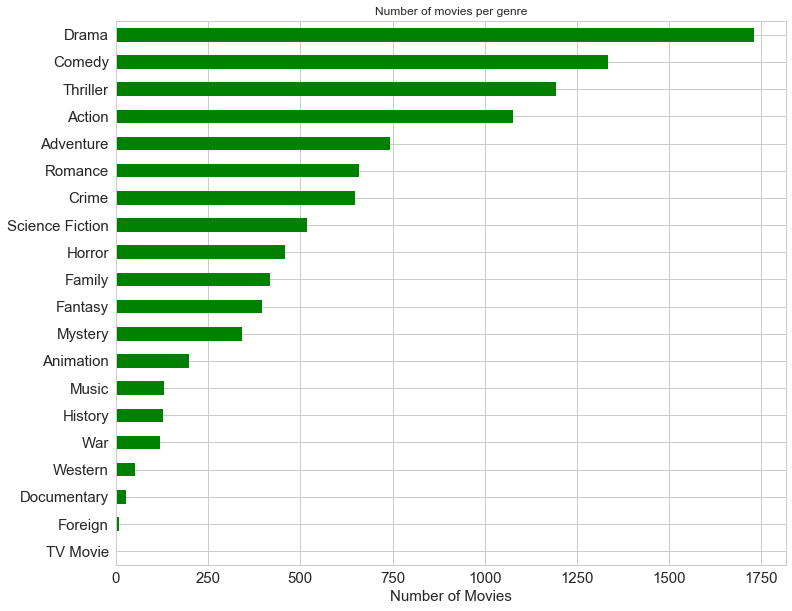

In [78]:
# call the function we defined above, define that we want to sort the values in ascending order
number_genre.sort_values(ascending = True, inplace = True)
# define, that we want the data to be plottet as a bar chart, using green as bar colour and 15 as fontsize
ax = number_genre.plot.barh(color = 'g', fontsize = 15)
# set the title
ax.set(title = 'Number of movies per genre')
# set the label for the x axis and set the fontsize
ax.set_xlabel('Number of Movies', fontsize = '15')
# set the size of our graph
ax.figure.set_size_inches(12, 10)
# execute and show it
plt.show()

> This bar chart shows in a nice way, that movies with 'Drama' as categorization are leading the way, followed by Comedy and Thriller. The number for TV-Movies seems to be so small, that it isn't even visible in our chart.

#### Which movie director did release the most movies?

> Let's see, which director has released the most movies. We are going to use the same procedure as we did for the genres. Therefore, i am not going to describe every step in detail.

In [79]:
number_directors = seperate_columns('director')
number_directors.head()

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Martin Scorsese     17
dtype: int64

> According to the analysis, Steven Spielberg is leading the way, followed by Clint Eastwood and Ridley Scott. Let's put that into a bar chart as well. 

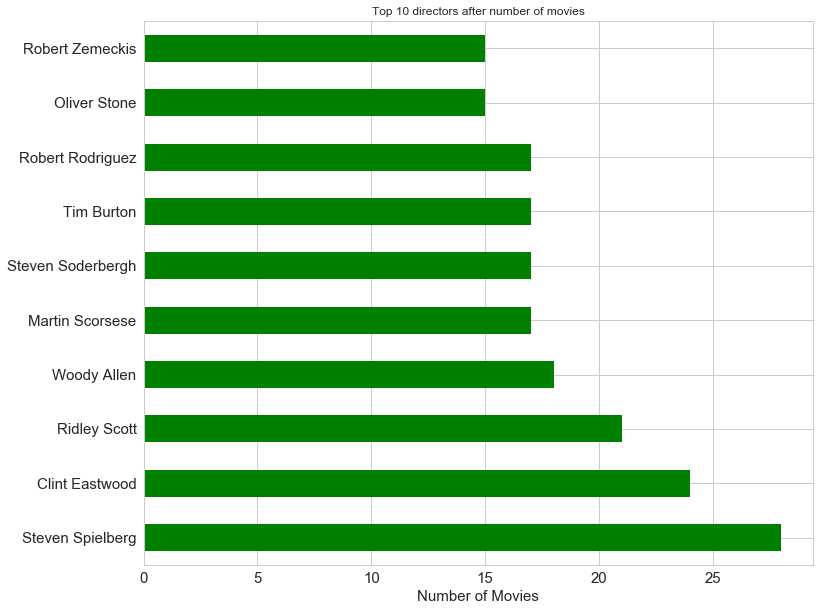

In [80]:
number_directors.sort_values(ascending = False, inplace = True)
ax = number_directors.iloc[:10].plot.barh(color = 'g', fontsize = 15)
ax.set(title = 'Top 10 directors after number of movies')
ax.set_xlabel('Number of Movies', fontsize = '15')
ax.figure.set_size_inches(12, 10)
plt.show()

> This bar chart shows that there are only three directors which have directed or been part of more than 20 movies, named Steven Spielberg, Clint Eastwood and Ridley Scott. Woody Allen is close to that, and Robert Rodriquez, Steven Soderbergh, Tim Burton and Martin Scorsese ar on par when it comes to number of movie releases. 

#### Which cast did take part in most movie releases?

> Let's see, which cast has released the most movies. We are going to use the same procedure as we did for the genres. Therefore, i am not going to describe every step in detail.

In [81]:
number_cast = seperate_columns('cast')
number_cast.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

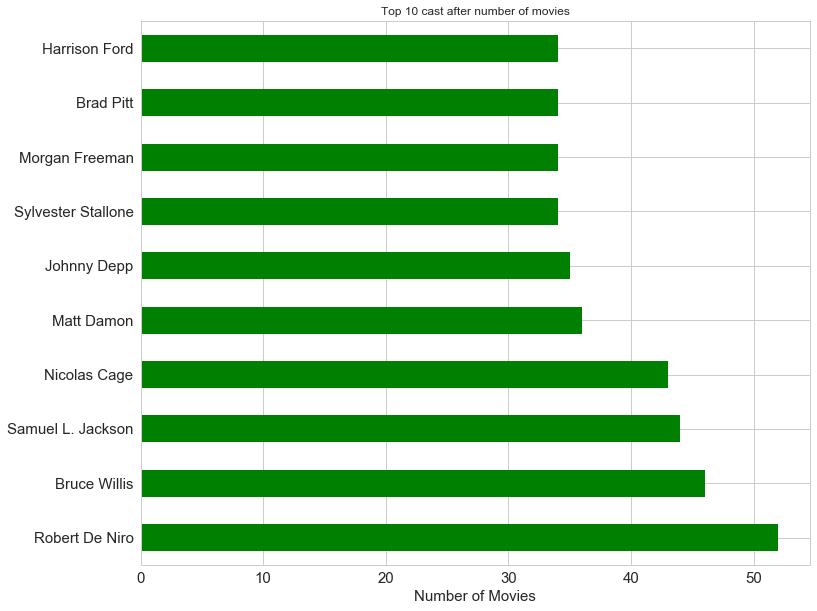

In [82]:
number_cast.sort_values(ascending = False, inplace = True)
ax = number_cast.iloc[:10].plot.barh(color = 'g', fontsize = 15)
ax.set(title = 'Top 10 cast after number of movies')
ax.set_xlabel('Number of Movies', fontsize = '15')
ax.figure.set_size_inches(12, 10)
plt.show()

> Taking a look at this bar chart, we can see that Robert de Niro is the one which leads by far in terms of movie releases. So was part of quite some movies, followed by Bruce Willis and Samuel L. Jackson.

> What we can already see that these names all belong to casts which are not that young anymore. This means, that there could be a correlation between number of movies released and age of a cast. As the age of a cast is not part of our dataframe, i am not able to calculate a correlation coefficient. But it would be an interesting analysis to do.

#### Which production company has been the busiest when it comes to movie releases?
> Let's see, which production company has released the most movies or been part of movie releases. We are going to use the same procedure as we did for the genres. Therefore, i am not going to describe every step in detail.

In [83]:
number_production = seperate_columns('production_companies')
number_production.head()

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64

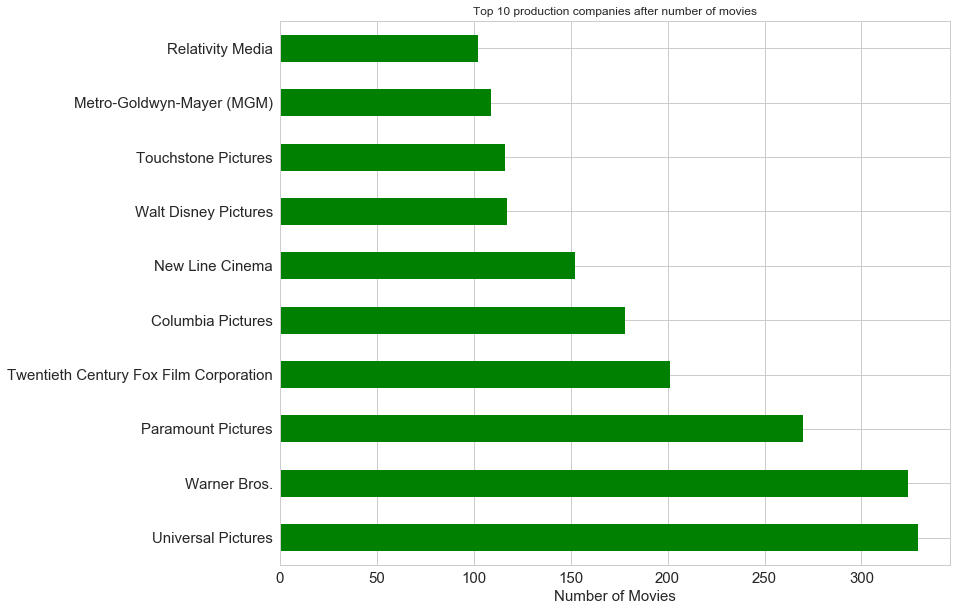

In [84]:
number_production.sort_values(ascending = False, inplace = True)
ax = number_production.iloc[0:10].plot.barh(color = 'g', fontsize = 15)
ax.set(title = 'Top 10 production companies after number of movies')
ax.set_xlabel('Number of Movies', fontsize = '15')
ax.figure.set_size_inches(12, 10)
plt.show()

> Taking a look at this bar chart, we can see that Universal Pictures and Warner Bros are the studios which have releases or been part of the most movie releases. It is important to know that it is possible, that several production companies can be part of a movie releases.

#### Prepare for analysis, Part II

> If we want to analyse, which cast, genre or production companie generate the most profit, revenue who accounts for the highest popularity, we have to prepare our data in different way like we did before.

> I am going to create a new dataframe, based on the original one and drop the columns which i won't need for my analysis. Then i will do some adjustment on the data, like seperating the strings for cast, genre and production companie. The steps i have taken are described below. As i am repeating these steps for cast, genre and production, i will only describe my steps in detailed for the first example.

#### Prepare the data for cast analysis

In [85]:
# copy the the data of the original dataframe and store it in a new one
cast_deepdive = tmdb_movie_dataset.copy()
# drop columns which aren't needed
cast_deepdive.drop(['original_title', 'genres', 'director', 'runtime', 'release_date', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)
# show the first 10 results of our newly created dataframe
cast_deepdive.head(10)

,id,popularity,profit_earned_by_movie,budget,revenue,cast,release_year
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,2015
2,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,2015
3,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2015
4,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,2015
5,281957,9.110700,3.979505e+08,135000000.0,5.329505e+08,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,2015
6,87101,8.654359,2.856035e+08,155000000.0,4.406035e+08,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,2015
7,286217,7.667400,4.873803e+08,108000000.0,5.953803e+08,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,2015
8,211672,7.404165,1.082731e+09,74000000.0,1.156731e+09,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,2015
9,150540,6.326804,6.787086e+08,175000000.0,8.537086e+08,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,2015


> Ok, this is good. The rows we don't need have been dropped from our dataframe. But we aren't finished yet and will have do finish some more steps.

In [86]:
# only address the columns id and cast using the loc function
casts = cast_deepdive.loc[:, ['id', 'cast']]
# show the first 5 rows of our dataframe
casts.head()

,id,cast
0,135397,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,76341,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2,262500,Shailene Woodley|Theo James|Kate Winslet|Ansel...
3,140607,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4,168259,Vin Diesel|Paul Walker|Jason Statham|Michelle ...


In [87]:
# now we are going to create a function which splits the strings and create a list out of it.
cast_listing = casts['cast'].str.split('|').tolist()
for i in range(len(cast_listing)):
    if not isinstance(cast_listing[i], list):
        cast_listing[i] = [cast_listing[i]]
# show the list
cast_listing

[['Chris Pratt',
  'Bryce Dallas Howard',
  'Irrfan Khan',
  "Vincent D'Onofrio",
  'Nick Robinson'],
 ['Tom Hardy',
  'Charlize Theron',
  'Hugh Keays-Byrne',
  'Nicholas Hoult',
  'Josh Helman'],
 ['Shailene Woodley',
  'Theo James',
  'Kate Winslet',
  'Ansel Elgort',
  'Miles Teller'],
 ['Harrison Ford',
  'Mark Hamill',
  'Carrie Fisher',
  'Adam Driver',
  'Daisy Ridley'],
 ['Vin Diesel',
  'Paul Walker',
  'Jason Statham',
  'Michelle Rodriguez',
  'Dwayne Johnson'],
 ['Leonardo DiCaprio',
  'Tom Hardy',
  'Will Poulter',
  'Domhnall Gleeson',
  'Paul Anderson'],
 ['Arnold Schwarzenegger',
  'Jason Clarke',
  'Emilia Clarke',
  'Jai Courtney',
  'J.K. Simmons'],
 ['Matt Damon',
  'Jessica Chastain',
  'Kristen Wiig',
  'Jeff Daniels',
  'Michael PeÃ±a'],
 ['Sandra Bullock',
  'Jon Hamm',
  'Michael Keaton',
  'Allison Janney',
  'Steve Coogan'],
 ['Amy Poehler', 'Phyllis Smith', 'Richard Kind', 'Bill Hader', 'Lewis Black'],
 ['Daniel Craig',
  'Christoph Waltz',
  'LÃ©a Seydoux'

In [88]:
# create an index using the cast listing from above and stack it by id 
cast_stacked = pd.DataFrame(cast_listing, index=casts['id']).stack()
# show the first 5 rows using the head function
cast_stacked.head()

id       
135397  0            Chris Pratt
        1    Bryce Dallas Howard
        2            Irrfan Khan
        3      Vincent D'Onofrio
        4          Nick Robinson
dtype: object

In [89]:
# reset the index and show first 5 rows using the head function
cast_stacked  = cast_stacked .reset_index()
cast_stacked.head()

,id,level_1,0
0,135397,0,Chris Pratt
1,135397,1,Bryce Dallas Howard
2,135397,2,Irrfan Khan
3,135397,3,Vincent D'Onofrio
4,135397,4,Nick Robinson


In [90]:
# ok, we ony need the columns id and 0, so we need to ignore the rest. We will do that by using the loc function.
cast_stacked = cast_stacked.loc[:, ['id', 0]]
# again, display first 5 rows in order to see if it worked
cast_stacked.head()

,id,0
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


In [91]:
# in order for merging in a later step, we need to rename the columns.
cast_stacked.columns = ['id', 'cast']
# display first 5 rows
cast_stacked.head()

,id,cast
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


In [92]:
# merge the cast_stacked with cast_deepdive. We define that the matching is done on the ID and that we do a left join.
merging_for_cast = pd.merge(cast_deepdive, cast_stacked, on='id', how='left')
# display first 5 rows
merging_for_cast.head()

,id,popularity,profit_earned_by_movie,budget,revenue,cast_x,release_year,cast_y
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,Chris Pratt
1,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,Bryce Dallas Howard
2,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,Irrfan Khan
3,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,Vincent D'Onofrio
4,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,Nick Robinson


> Ok, this looks good, besides that we have to cast columns, one with the string including the pipe and one with the the cast names seperated. We only wand to keep the cast_y column and get rid of the cast_x one.

In [93]:
# drop the cast_x and id column
merging_for_cast.drop(['cast_x', 'id'], axis=1, inplace=True)
# display first 5 rows
merging_for_cast.head()

,popularity,profit_earned_by_movie,budget,revenue,release_year,cast_y
0,32.985763,1.363529e+09,150000000.0,1.513529e+09,2015,Chris Pratt
1,32.985763,1.363529e+09,150000000.0,1.513529e+09,2015,Bryce Dallas Howard
2,32.985763,1.363529e+09,150000000.0,1.513529e+09,2015,Irrfan Khan
3,32.985763,1.363529e+09,150000000.0,1.513529e+09,2015,Vincent D'Onofrio
4,32.985763,1.363529e+09,150000000.0,1.513529e+09,2015,Nick Robinson


> Nearly done. Now we need to set the right names for our columns.

In [94]:
# set the names for each column in our dataset
merging_for_cast.columns = ['popularity', 'profit_earned_by_movie','budget','revenue','release_year','cast']
# print the results
print(merging_for_cast.head())

   popularity  profit_earned_by_movie       budget       revenue  \
0   32.985763            1.363529e+09  150000000.0  1.513529e+09   
1   32.985763            1.363529e+09  150000000.0  1.513529e+09   
2   32.985763            1.363529e+09  150000000.0  1.513529e+09   
3   32.985763            1.363529e+09  150000000.0  1.513529e+09   
4   32.985763            1.363529e+09  150000000.0  1.513529e+09   

   release_year                 cast  
0          2015          Chris Pratt  
1          2015  Bryce Dallas Howard  
2          2015          Irrfan Khan  
3          2015    Vincent D'Onofrio  
4          2015        Nick Robinson  


> Ok, so we have done all preparation needed and are now able to do some analysis on the profit earned, movies released and popularity of the cast. Let's start by plotting the top casts in terms of movies released. We already did this before, but this way we are able to see if the preparation we did before worked.

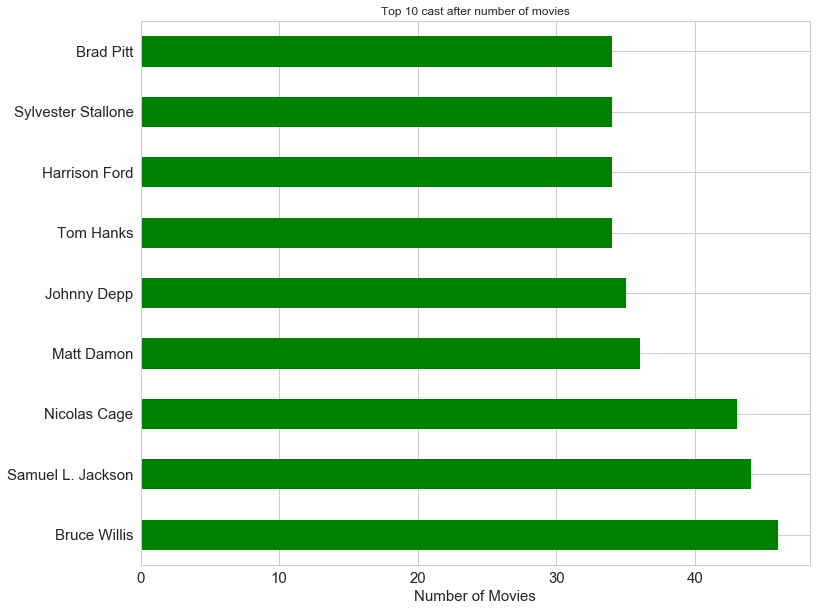

In [95]:
ax = merging_for_cast['cast'].value_counts().iloc[1:10].plot.barh(color = 'g', fontsize = 15)
ax.set(title = 'Top 10 cast after number of movies')
ax.set_xlabel('Number of Movies', fontsize = '15')
ax.figure.set_size_inches(12, 10)
plt.show()

#### Which cast accounts for the highest total popularity?

> Let's see, which cast has the highest popularity. First, we are creating a function which calculates this and then address this function when we are plotting our bar chart.

In [96]:
# group by cast and calculate the total popularity. store this in a variable
cast_popularity = merging_for_cast.groupby('cast').popularity.sum()
# show the 10 best casts in term of popularity using the nlargest function
cast_popularity.nlargest(10)

cast
Samuel L. Jackson    81.751763
Harrison Ford        77.079997
Brad Pitt            73.248850
Michael Caine        70.945444
Robert De Niro       67.643253
Johnny Depp          66.785346
Bruce Willis         64.906881
Tom Hardy            63.423412
Anne Hathaway        61.798675
Tom Hanks            61.314000
Name: popularity, dtype: float64

> This is interesting. While Bruce Willis has been second in terms of movie release numbers, he is only 7th in terms of total popularity. Let's plot that as well. 

Text(0,0.5,'Average popularity')

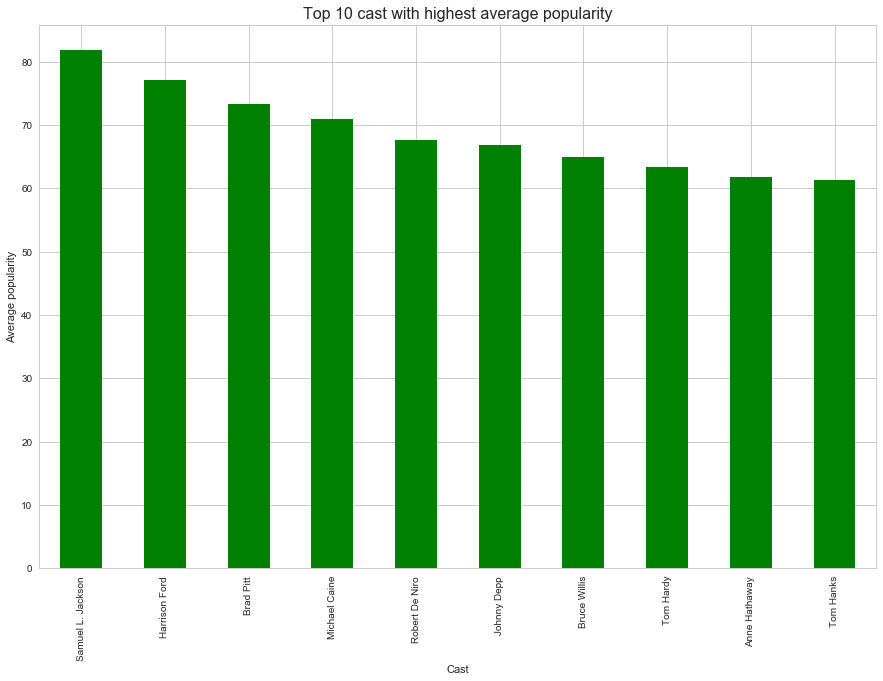

In [97]:
# call the function we defined above, take the 10 largest values and plot it into a bar chart
# with a given figsize and green as bar chart colour. Do not display a legend.
cast_popularity.nlargest(10).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
# set the title for the bar chart
plt.title('Top 10 cast with highest average popularity', fontsize=16)
# set the label for the x axis
plt.xlabel('Cast')
# set the label for the y axis
plt.ylabel('Average popularity')

> Samuel Jackson leads the cast in terms of total profit earned by movies. We do only have Anne Hathaway representing women in the top 10 cast. Her and Tom Hardy are also the youngest cast in this resultset, the other ones being older thus they might have had the opportunity to be part of more movies like the two did.

#### Which cast accounts for the highest average profit earned by movies?

> Let's see, which cast has the highest average profit. First, we are creating a function which calculates this and then address this function when we are plotting our bar chart. We are using the same steps as before, therefore i am not describing each step.

In [98]:
cast_profit = merging_for_cast.groupby('cast').profit_earned_by_movie.mean()
cast_profit.nlargest(10)

cast
Daisy Ridley          1.868178e+09
Nick Robinson         1.363529e+09
Idina Menzel          1.124219e+09
Jonathan Groff        1.124219e+09
Santino Fontana       1.124219e+09
Ken Howard            1.084280e+09
Wendy Gazelle         1.084280e+09
Miranda Cosgrove      8.947619e+08
Bob Peck              8.571000e+08
Robert MacNaughton    7.824106e+08
Name: profit_earned_by_movie, dtype: float64

Text(0,0.5,'Average profit')

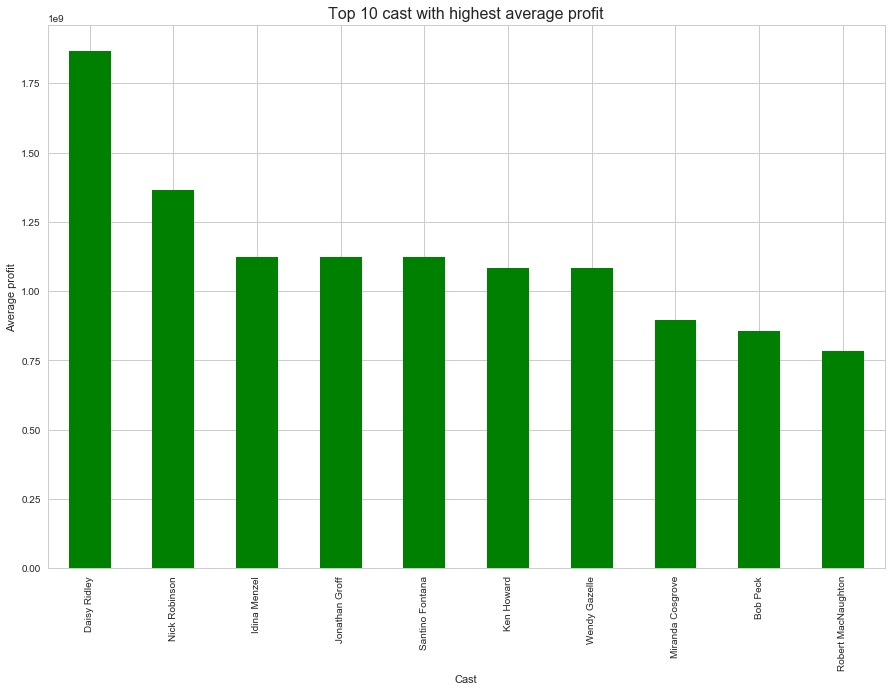

In [99]:
cast_profit.nlargest(10).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 10 cast with highest average profit', fontsize=16)
plt.xlabel('Cast')
plt.ylabel('Average profit')

> Daisy Ridley being the cast accounting for the highest average profit earned by movies seems reasonable, as she has been the main character for the Star Wars Movies. And she hasn't been part of many movies as well, thats why she gets such a high value. This is also why we have names appearing in this resultsets which might not be widley known.

> It is important to know, that even if a cast might be not generally known to people, they can be part of a large variety of movies. You don't have to be a main character. So there are many, many people which might be side characters in many movies, therefore getting counted for a high average profit. I

> Anyway, this calculation doesn't give us really good insights, as you have to take into account, that the number of movies a cast has been part of and the fact, that you don't have to be the main character to be listed might influence our view.

#### Prepare the data for genre analysis

> Now, we want to do the same for genres. We are using the same steps like we did for cast, so i am not describing each step in detail again.

In [100]:
genre_deepdive = tmdb_movie_dataset.copy()
genre_deepdive.drop(['original_title', 'director', 'cast','runtime', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)
genre_deepdive.head(10)

,id,popularity,profit_earned_by_movie,budget,revenue,genres,release_date,release_year
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Action|Crime|Thriller,2015-04-01,2015
5,281957,9.110700,3.979505e+08,135000000.0,5.329505e+08,Western|Drama|Adventure|Thriller,2015-12-25,2015
6,87101,8.654359,2.856035e+08,155000000.0,4.406035e+08,Science Fiction|Action|Thriller|Adventure,2015-06-23,2015
7,286217,7.667400,4.873803e+08,108000000.0,5.953803e+08,Drama|Adventure|Science Fiction,2015-09-30,2015
8,211672,7.404165,1.082731e+09,74000000.0,1.156731e+09,Family|Animation|Adventure|Comedy,2015-06-17,2015
9,150540,6.326804,6.787086e+08,175000000.0,8.537086e+08,Comedy|Animation|Family,2015-06-09,2015


In [101]:
genre_1 = genre_deepdive.loc[:, ['id', 'genres']]
genre_listing = genre_1['genres'].str.split('|').tolist()
for i in range(len(genre_listing)):
    if not isinstance(genre_listing[i], list):
        cast_listing[i] = [genre_listing[i]]
genre_stacked = pd.DataFrame(genre_listing, index=genre_1['id']).stack()
genre_stacked  = genre_stacked .reset_index()
genre_stacked = genre_stacked.loc[:, ['id', 0]]
genre_stacked.columns = ['id', 'genres']
merging_for_genre = pd.merge(genre_deepdive, genre_stacked, on='id', how='left')
merging_for_genre.drop(['genres_x', 'id'], axis=1, inplace=True)
merging_for_genre.columns = ['popularity', 'profit_earned_by_movie','budget','revenue','release_date','release_year','genres']
print(merging_for_genre.head())

   popularity  profit_earned_by_movie       budget       revenue release_date  \
0   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   
1   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   
2   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   
3   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   
4   28.419936            2.284364e+08  150000000.0  3.784364e+08   2015-05-13   

   release_year           genres  
0          2015           Action  
1          2015        Adventure  
2          2015  Science Fiction  
3          2015         Thriller  
4          2015           Action  


> Again, let's count the number of movie releases like we did before. It's a good check if all worked nicely.

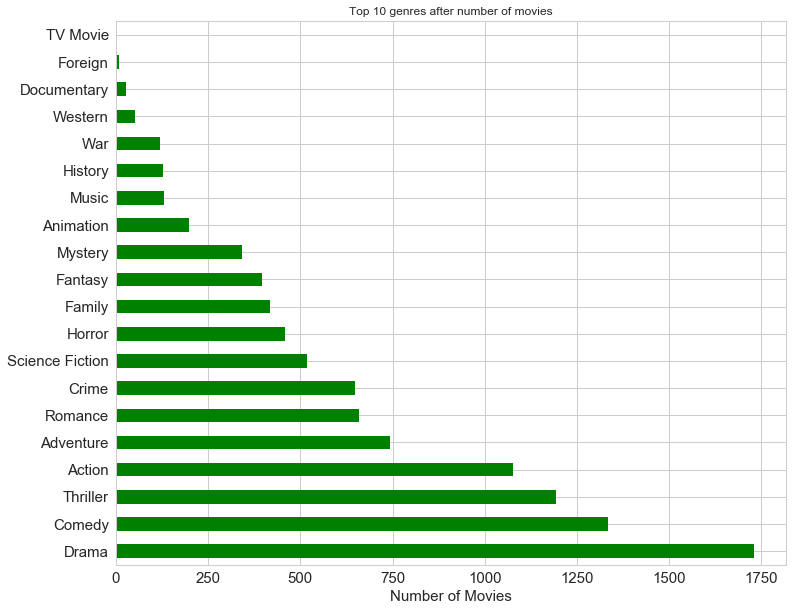

In [102]:
ax = merging_for_genre['genres'].value_counts().plot.barh(color = 'g', fontsize = 15)
ax.set(title = 'Top 10 genres after number of movies')
ax.set_xlabel('Number of Movies', fontsize = '15')
ax.figure.set_size_inches(12, 10)
plt.show()

> Ok, this looks good. Now we are ready to do some calculations for the genres. 

#### Which are the 20 most popular genres?

> Let's see, which genres are the most popular.

Text(0,0.5,'Popularity')

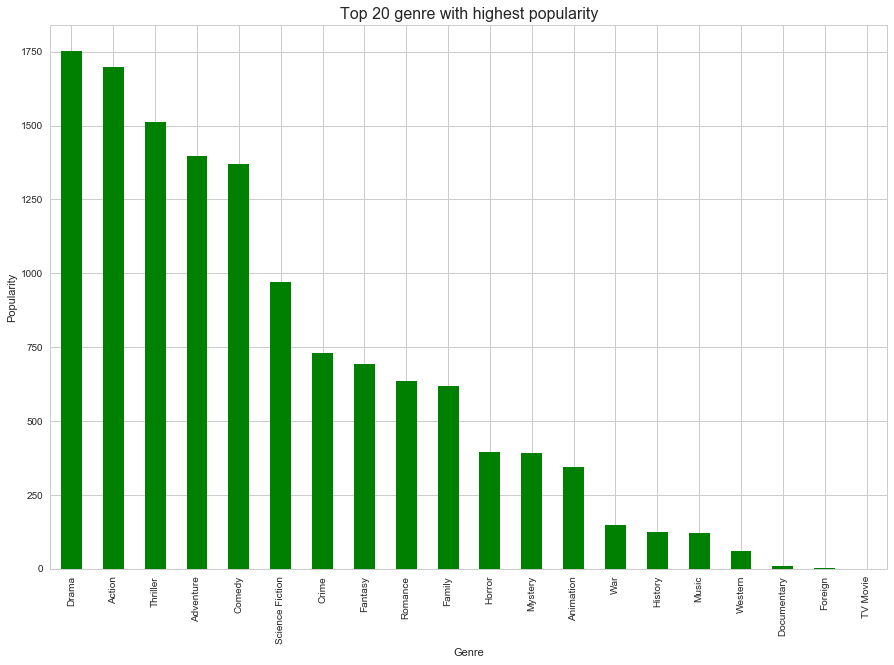

In [103]:
genre_popularity = merging_for_genre.groupby('genres').popularity.sum()
genre_popularity.nlargest(20).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 genre with highest popularity', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Popularity')

> Drama, Action and Thriller are the genres which have the highest total popularity. But what about the average popularity per genre?

#### Which genres have the highest average popularity?

Text(0,0.5,'Average popularity')

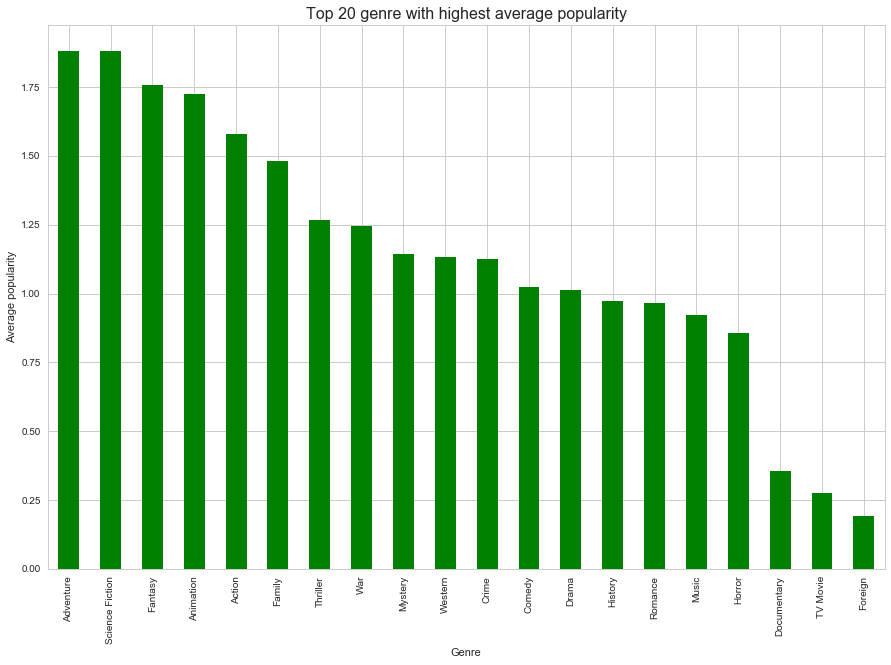

In [104]:
genre_popularity = merging_for_genre.groupby('genres').popularity.mean()
genre_popularity.nlargest(20).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 genre with highest average popularity', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Average popularity')

> Science Fiction is leading the way for the highst average popularity. Being only 6th in terms of total popularity, in comparison to the numbers of movies released Science Fiction seems to be more popular in average.

#### Which genre generated the most profit?

> Let's have a look at which genres are the best in terms of total profit. Again, we are using the same steps as before.

Text(0,0.5,'Profit')

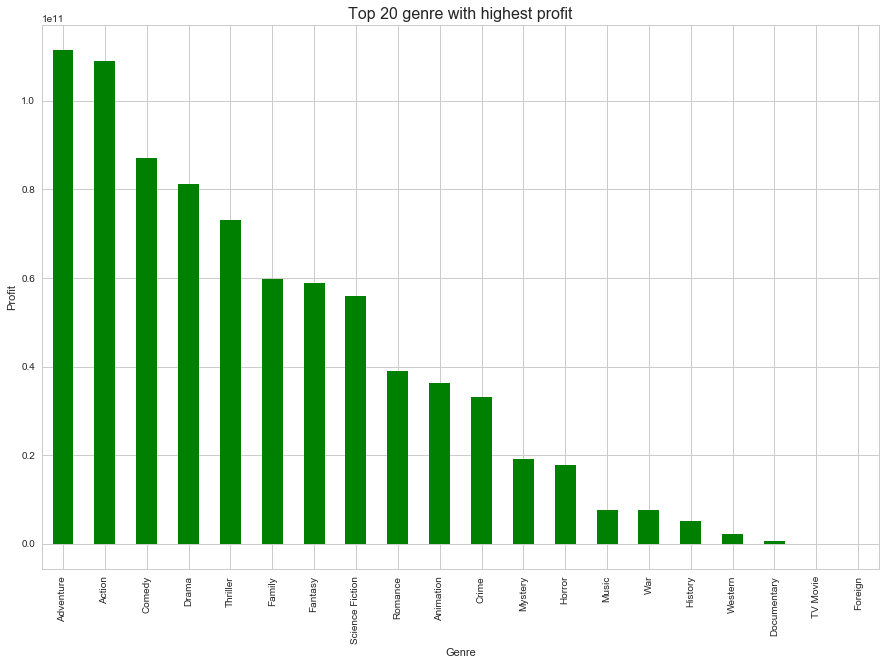

In [105]:
genre_profit = merging_for_genre.groupby('genres').profit_earned_by_movie.sum()
genre_profit.nlargest(20).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 genre with highest profit', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Profit')

> Adventure and Action are the leading genres in terms of total profit, followed by Comedy and Drama. Genres like Animation are comparable small in terms of total profit, but that might be due to the fact, that animation as a genre is comparably younger than adventure or action movies. This is why we have to take a look at the average profit, which compares the profit to the number of movies released.

#### Which genres have the highest average profit?

> Let's plot the average profit per genre into a bar chart, so that we can see which genre performs best.

Text(0,0.5,'Average profit')

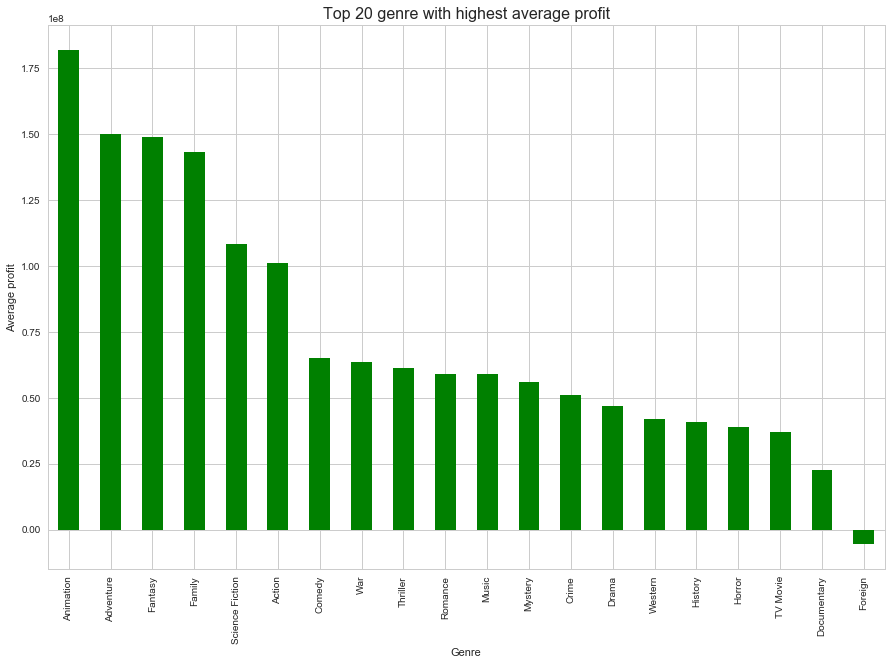

In [106]:
genre_profit = merging_for_genre.groupby('genres').profit_earned_by_movie.mean()
genre_profit.nlargest(20).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 genre with highest average profit', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Average profit')

> And voila, this confirms what we already saw in our bar chart for total profit. Animation as a genre is now leading the way, followed by adventure, fantasy, family and science fiction. Being a much 'younger' genre as adventure, fantasy or family, animation does a very good job and therefore is best in terms of average profit, which means that the movies which have been released by now, are gaining good profit.

#### Prepare the data for production company analysis

> Now, we are going the analyze how production companies are performing when it comes to profit and popularity. In order to get the data needed, we are doing just the same what we did for genre and cast.

In [107]:
production_deepdive = tmdb_movie_dataset.copy()
production_deepdive.drop(['original_title', 'director', 'cast','runtime', 'genres', 'vote_count', 'vote_average'], axis=1, inplace=True)
production_deepdive.head(10)

,id,popularity,profit_earned_by_movie,budget,revenue,production_companies,release_date,release_year
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015
5,281957,9.110700,3.979505e+08,135000000.0,5.329505e+08,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,2015
6,87101,8.654359,2.856035e+08,155000000.0,4.406035e+08,Paramount Pictures|Skydance Productions,2015-06-23,2015
7,286217,7.667400,4.873803e+08,108000000.0,5.953803e+08,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,2015
8,211672,7.404165,1.082731e+09,74000000.0,1.156731e+09,Universal Pictures|Illumination Entertainment,2015-06-17,2015
9,150540,6.326804,6.787086e+08,175000000.0,8.537086e+08,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,2015


In [108]:
production = production_deepdive.loc[:, ['id', 'production_companies']]
production_listing = production['production_companies'].str.split('|').tolist()
for i in range(len(production_listing)):
    if not isinstance(production_listing[i], list):
        production_listing[i] = [production_listing[i]]
production_stacked = pd.DataFrame(production_listing, index=production['id']).stack()
production_stacked  = production_stacked.reset_index()
production_stacked = production_stacked.loc[:, ['id', 0]]
production_stacked.columns = ['id', 'production_companies']
merging_for_production = pd.merge(production_deepdive, production_stacked, on='id', how='left')
merging_for_production.drop(['production_companies_x', 'id'], axis=1, inplace=True)
merging_for_production.columns = ['popularity', 'profit_earned_by_movie','budget','revenue','release_date','release_year','production_companies']
print(merging_for_production.head())

   popularity  profit_earned_by_movie       budget       revenue release_date  \
0   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   
1   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   
2   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   
3   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   
4   32.985763            1.363529e+09  150000000.0  1.513529e+09   2015-06-09   

   release_year     production_companies  
0          2015        Universal Studios  
1          2015     Amblin Entertainment  
2          2015       Legendary Pictures  
3          2015  Fuji Television Network  
4          2015                   Dentsu  


#### What are the best production companies in terms of total profit?

Text(0,0.5,'Profit')

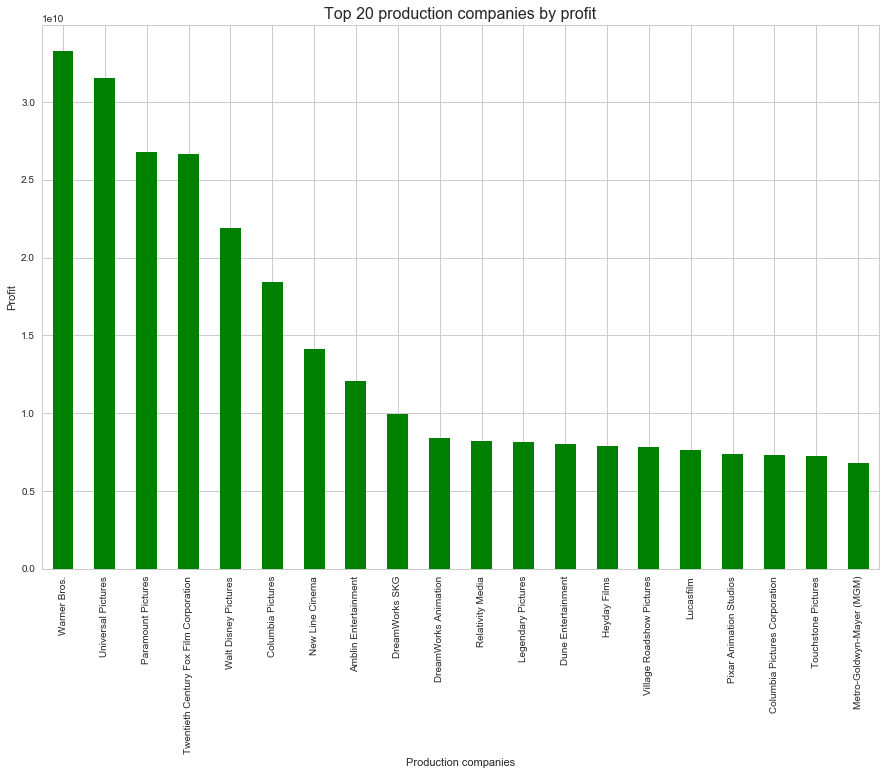

In [109]:
production_profit = merging_for_production.groupby('production_companies').profit_earned_by_movie.sum()
production_profit.nlargest(20).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 production companies by profit', fontsize=16)
plt.xlabel('Production companies')
plt.ylabel('Profit')

> Looks like Warner Bros. did generate quite some profit until now, as well as Universal and Paramount Pictures. As there are to many production companies to plot them all in one bar chart, we only get the 20 best studios. Again, it is important to know that some production companies have a long history when it comes to movie releases and some are just getting started. So we have to take a look at the average profit later on.

> But first, let's have a look at the production companies and their total popularity.

#### Which production companies are the most popular ones?

> Let's plot this into a bar chart as well.

Text(0,0.5,'Popularity')

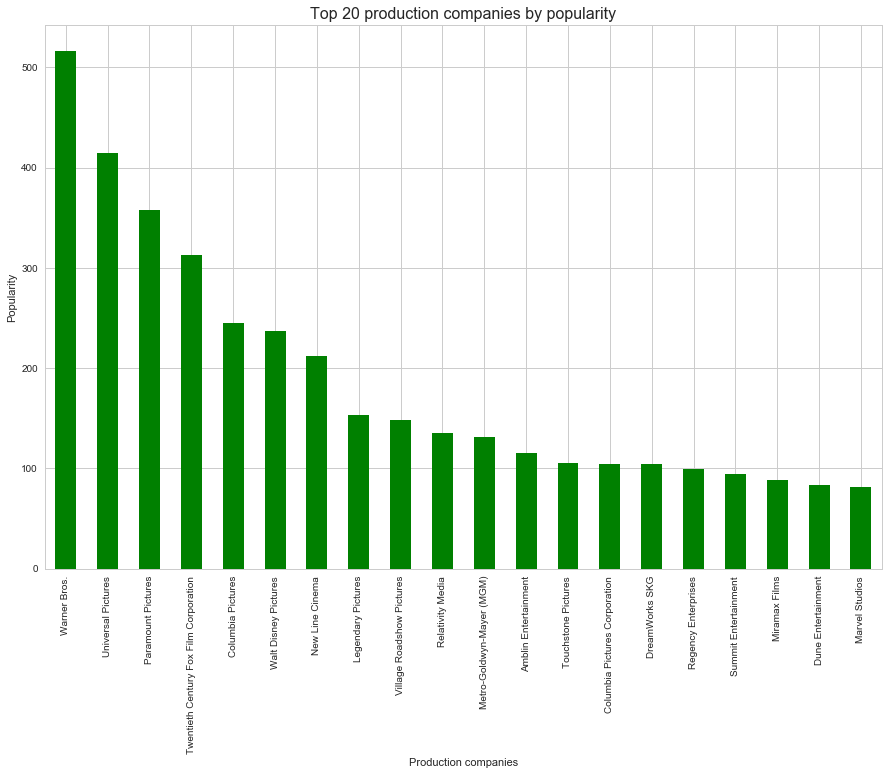

In [110]:
production_popularity = merging_for_production.groupby('production_companies').popularity.sum()
production_popularity.nlargest(20).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 production companies by popularity', fontsize=16)
plt.xlabel('Production companies')
plt.ylabel('Popularity')

> This looks a lot like the bar chart for total profit. This makes sense, as we already know that the correlation between popularity and profit earned is a strong positive one. So the popularity of a production studio will correlate as well with the profit.

#### Which production companies are generating the most profit in average?

> Plot it.

Text(0,0.5,'Average profit')

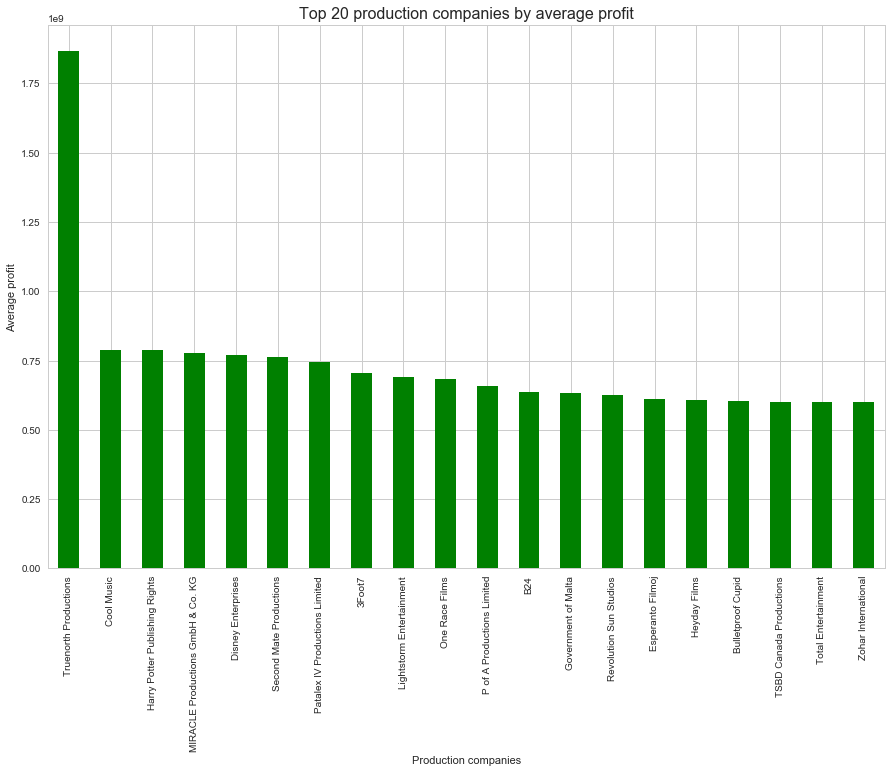

In [111]:
production_profit_mean = merging_for_production.groupby('production_companies').profit_earned_by_movie.mean()
production_profit_mean.nlargest(20).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 production companies by average profit', fontsize=16)
plt.xlabel('Production companies')
plt.ylabel('Average profit')

> If we plot the average profit made by production companies, we get a different picture. There are many production companies, which haven't released many movies or been part of a lot movie releases, but generate good profit in comparison, hence getting a good average profit. This chart is led by Truenorth Prodcutions and Cool Music. This can be confirmed if we also plot the average popularity per production company.

#### Which production companies are getting the highest average popularity?

Text(0,0.5,'Average popularity')

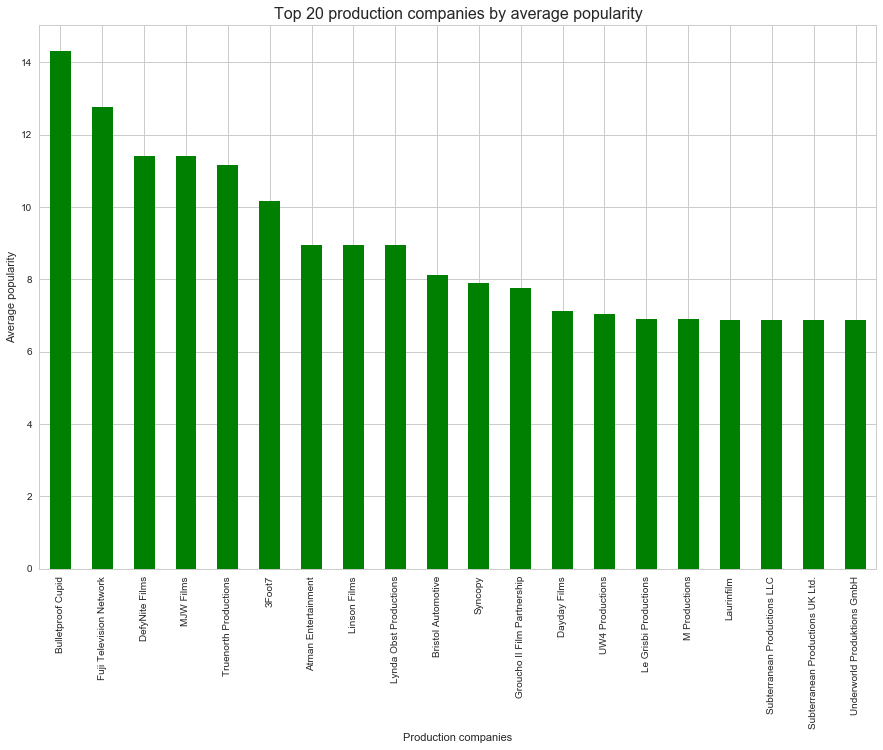

In [112]:
production_popularity_mean = merging_for_production.groupby('production_companies').popularity.mean()
production_popularity_mean.nlargest(20).plot(kind='bar', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 production companies by average popularity', fontsize=16)
plt.xlabel('Production companies')
plt.ylabel('Average popularity')

> Again, not the big names like Warner Bros or Universal are leading the way, but smaller and lesser known studios.

<a id='conclusions'></a>
## Conclusions

> **1. Conclusion**: The number of movies released per year is rising, as well as the budget, revenue and (average) profit. This implies that the movie branch is doing good not only at releasing more movies, but also at making them more profitable.

> **2. Conclusion**: According to the analysis, that the "success" (profit) shows almost none correlation to the year or month it is released in. This implies that it doesn't matter which year you choose for release, neither does the month, as the correlation is very weak as well. What might have an effect is, if we want to take a look at the "time" factor is, which movies have been released at the same time and if so, did they have an influence on one another. For example: Did a bluckbuster 'steal' popularity or revenue from a lesser known movie? 

> **3. Conclusion**: The results of the correlation analysis implies, that there is a strong relation between popularity and profit of a movie, as well as the popularity and the budget or revenue. As the correlation between budget and revenue is also a strong positive one, this implies that the more budget a movie has, the more popularity it get's and the more profit it generates. Anyway, it is not a perfect positive correlation, so there are still other factors which might come into play, like a movie being a sequel or prequel of a known one. 

> What would be interesting to know is, what has been done by the production studios to boost popularity, as well when they started to tease movies they produce. Is there a correlation between popularity and the time span a movie has been teased? Did the movie have a prequel? Is it part of a series, or even a movie based on a popular book? These are all questions which are left unanswered and therefore, we only can calculate the correlation between popularity and profit / revenue / budget. But what's the popularity really based on or better, what influences popularity besides the budget? 

> **4. Conclusion**: The runtime has only a weak correlation with (average) profit earned. At the same time, die average runtime is dropping form year to year and now ranking round about the total average runtime. This makes sense, as the production studies might have also concluded, that this correlation is also a weak one and therefore have shortened the runtime. But as the correlation between profit earned and runtime is also a weak one, this might not have been the sole reason for this decision. 

> **5. Conclusion**: Taking a look at the cast, there seems to be a correlation between age and number of movie released, as well as profit earned. We have a cast like Robert de Niro and Bruce Willis rank best in terms of total profit, for directors it's people like Steven Spielberg and Clint Eastwood. These are people which have been in the movie business for quite some years now. In order to calculate that, we would need some more data in our dataset, for example the current age of a cast. As long as we don't have that, we only can guess that based on the results we have. But it would make sense, because as older a cast gets, the more movie it can be part of. But there might also be many other factors for a cast that it get's more and more movie releases. Same goes for directors as well.

> All in all, we gained quite some interesting insights, but still missing some data to do a more detailed analysis. What is totally missing in this dataset is the information, in how many countries a movie has been released. This might have a big influence on popularity and profit. 

> Questions which could be asked if we had more data:
> - Is there a correlation between age and a casts popularity / profit earned / movies released?
> - Is there a correlation between weather and popularity / profit of a movie?
> - Is there a correlation between numbers of countries a movie has been released in and profit / popularity?
> - Is there a difference between movies which are part of a series or just a standalone?
> - Is there a correlation betweeen movies being based on a book / tv series / game or else and popularity / profit?